In [255]:
# !python -m pip uninstall scikit-learn --yes

In [256]:
# pip install scikit-learn==1.2.2 --user

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [258]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [259]:
# import sklearn
# print(sklearn.__version__)

In [260]:
from imblearn.over_sampling import SMOTENC
from sklearn.utils import resample

In [261]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [262]:
file_path = './data/data_iu_proccessed_p3.csv'
# file_path = './data/data_iu_proccessed_p3_v2.csv'

file_path_test = './data/data_iu_proccessed_p3_20231.csv'

# Read the CSV file with specified data types
df = pd.read_csv(file_path)
df_20231 = pd.read_csv(file_path_test)

df = pd.concat([df, df_20231], ignore_index=True)

In [263]:
df.head(5)

,Unnamed: 0,TenMH,MaMH,Major,SoTinChi,SiSoTKB,ClassifyAs,TKB_LT2,TKB_LT3,TKB_LT4,...,TKB_LT7,TKB_TH2,TKB_TH3,TKB_TH4,TKB_TH5,TKB_TH6,TKB_TH7,HK,GVLT,GVTH
0,0,Kinh tế hành vi và chính sách công,PM5110,BA BA,2,50.0,4,0,0,0,...,0,0,0,0,0,0,0,2,Nguyen Van Phuong,unassigned
1,1,Kinh tế hành vi và chính sách công,PM5110,BA BA,2,61.0,2,0,0,0,...,0,0,0,0,0,0,0,2,Nguyen Van Phuong,unassigned
2,2,Kinh tế hành vi và chính sách công,PM5110,BA BA,2,14.0,1,0,0,0,...,7,0,0,0,0,0,0,3,Nguyen Van Phuong,unassigned
3,3,Kinh tế lượng và phân tích chính sách,PM5214,BA BA,2,50.0,4,0,0,0,...,0,0,0,0,0,0,0,2,Nguyen Phuong Anh,unassigned
4,4,Kỹ năng lãnh đạo trong khu vực công,PM5212,BA BA,2,41.0,2,0,0,0,...,7,0,0,0,0,0,0,1,Trinh Viet Dung,unassigned


In [264]:
df_20231.head(5)

,Unnamed: 0,TenMH,MaMH,Major,SoTinChi,SiSoTKB,ClassifyAs,TKB_LT2,TKB_LT3,TKB_LT4,...,TKB_LT7,TKB_TH2,TKB_TH3,TKB_TH4,TKB_TH5,TKB_TH6,TKB_TH7,HK,GVLT,GVTH
0,0,Forecasting Techniques,ISE058IU,IEMIEM,3,15,4,0,0,13,...,0,0,0,0,0,0,0,1,Tran Duc Vi,unassigned
1,1,AI for Healthcare,BM096IU,BM BME,3,55,3,0,0,1,...,0,0,0,0,0,0,0,1,Ngo Thi Lua,unassigned
2,2,Academic English,BT310UN,BT BT,3,40,4,0,0,0,...,1,0,0,0,0,0,0,1,Nguyen Van Toan,unassigned
3,3,Academic and Professional Development,UMCDQ3-15-3,BA BA,4,40,3,0,0,0,...,7,0,0,0,0,0,0,1,Nguyen The Man,unassigned
4,4,Academic and Professional Development,UMCDQ3-15-3,BA BA,4,40,3,0,0,0,...,0,0,0,0,0,0,0,1,Alang Tho,unassigned


In [265]:
# Remove the specified columns
columns_to_remove = ['Unnamed: 0', 'TenMH']  # Columns to be removed
df.drop(columns=columns_to_remove, inplace=True)
df.dtypes

df_20231.drop(columns=columns_to_remove, inplace=True)

In [266]:
df.shape

(9762, 20)

In [267]:
#-----------4 Classes--------------
#Create a dictionary to map values
class_mapping = {1: 'Class1', 2: 'Class2', 3: 'Class3', 4: 'Class4'}

# Map the values in the 'ClassifyAs' column
df['ClassifyAs'] = df['ClassifyAs'].map(class_mapping)

#-----------2 Classes (Over90)--------------
# # Create a dictionary to map values
# class_mapping = {1: 'Class1', 2: 'Class1', 3: 'Class2', 4: 'Class2'}

# # Map the values in the 'ClassifyAs' column
# df['ClassifyAs'] = df['ClassifyAs'].map(class_mapping)

#---------- 2 Classes (TR89-Spread)-------------
# # Create a dictionary to map values
# class_mapping = {1: 'Class1', 2: 'Class2', 3: 'Class1', 4: 'Class2'}

# # Map the values in the 'ClassifyAs' column
# df['ClassifyAs'] = df['ClassifyAs'].map(class_mapping)

#---------- 2 Classes (High vs Low priority course)-------------
# # Create a dictionary to map values
# class_mapping = {1: 'Class1', 2: 'Class2', 3: 'Class2', 4: 'Class2'}

# # Map the values in the 'ClassifyAs' column
# df['ClassifyAs'] = df['ClassifyAs'].map(class_mapping)

#-----------------------------------------------------------------

In [268]:
df_20231['ClassifyAs'] = df_20231['ClassifyAs'].map(class_mapping)

In [269]:
# Count the occurrences of each class
class_counts = df['ClassifyAs'].value_counts()

# Print the counts
print(class_counts)

ClassifyAs
Class4    4520
Class2    3209
Class1    1197
Class3     836
Name: count, dtype: int64


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.4040672	test: 0.3940534	best: 0.3940534 (0)	total: 16.1ms	remaining: 16.1s
10:	learn: 0.4620433	test: 0.4551832	best: 0.4588005 (6)	total: 196ms	remaining: 17.6s
20:	learn: 0.4667685	test: 0.4609668	best: 0.4655019 (13)	total: 367ms	remaining: 17.1s
30:	learn: 0.4976006	test: 0.5049171	best: 0.5049171 (30)	total: 543ms	remaining: 17s
40:	learn: 0.5032237	test: 0.5102927	best: 0.5102927 (40)	total: 711ms	remaining: 16.6s
50:	learn: 0.5042142	test: 0.5074177	best: 0.5120031 (42)	total: 883ms	remaining: 16.4s
60:	learn: 0.5033849	test: 0.5071176	best: 0.5120031 (42)	total: 1.15s	remaining: 17.7s
70:	learn: 0.5072356	test: 0.5055322	best: 0.5120031 (42)	total: 1.34s	remaining: 17.5s
80:	learn: 0.5075157	test: 0.5048378	best: 0.5120031 (42)	total: 1.54s	remaining: 17.5s
90:	learn: 0.5062678	test: 0.5036718	best: 0.5120031 (42)	total: 1.72s	remaining: 17.2s
100:	learn: 0.5078282	test: 0.5042161	best: 0.5120031 (42)	total: 1.9s	remaining: 16.9s
110:	learn: 0.5084185	test: 0.505649

920:	learn: 0.5469221	test: 0.5408574	best: 0.5448886 (814)	total: 19s	remaining: 1.63s
930:	learn: 0.5468837	test: 0.5413999	best: 0.5448886 (814)	total: 19.3s	remaining: 1.43s
940:	learn: 0.5470208	test: 0.5408574	best: 0.5448886 (814)	total: 19.5s	remaining: 1.22s
950:	learn: 0.5475888	test: 0.5399645	best: 0.5448886 (814)	total: 19.7s	remaining: 1.01s
960:	learn: 0.5476870	test: 0.5384117	best: 0.5448886 (814)	total: 20s	remaining: 811ms
970:	learn: 0.5480507	test: 0.5389178	best: 0.5448886 (814)	total: 20.2s	remaining: 603ms
980:	learn: 0.5490797	test: 0.5400011	best: 0.5448886 (814)	total: 20.4s	remaining: 395ms
990:	learn: 0.5476587	test: 0.5403897	best: 0.5448886 (814)	total: 20.6s	remaining: 187ms
999:	learn: 0.5485598	test: 0.5403897	best: 0.5448886 (814)	total: 20.8s	remaining: 0us

bestTest = 0.5448885981
bestIteration = 814

Shrink model to first 815 iterations.


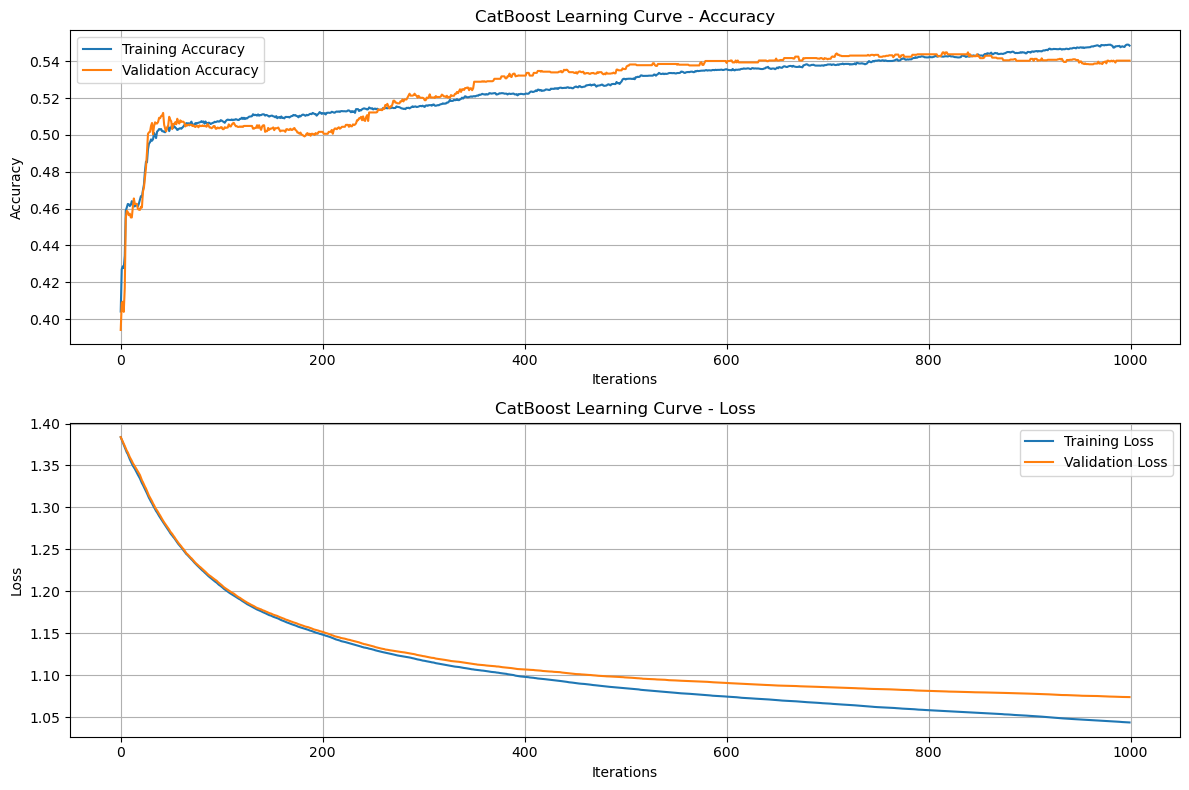

Model Accuracy: 0.522273425499232
0:	learn: 0.3586868	total: 14.4ms	remaining: 14.3s
1:	learn: 0.4313897	total: 34.8ms	remaining: 17.4s
2:	learn: 0.4295164	total: 52.3ms	remaining: 17.4s
3:	learn: 0.4309504	total: 68.8ms	remaining: 17.1s
4:	learn: 0.4504220	total: 85.7ms	remaining: 17.1s
5:	learn: 0.4486791	total: 102ms	remaining: 16.8s
6:	learn: 0.4463863	total: 118ms	remaining: 16.7s
7:	learn: 0.4483320	total: 134ms	remaining: 16.6s
8:	learn: 0.4471251	total: 150ms	remaining: 16.5s
9:	learn: 0.4481374	total: 169ms	remaining: 16.7s
10:	learn: 0.4468708	total: 186ms	remaining: 16.8s
11:	learn: 0.4448779	total: 205ms	remaining: 16.9s
12:	learn: 0.4457324	total: 221ms	remaining: 16.8s
13:	learn: 0.4471347	total: 240ms	remaining: 16.9s
14:	learn: 0.4481925	total: 257ms	remaining: 16.9s
15:	learn: 0.4469263	total: 274ms	remaining: 16.9s
16:	learn: 0.4481451	total: 290ms	remaining: 16.8s
17:	learn: 0.4474297	total: 307ms	remaining: 16.7s
18:	learn: 0.4479291	total: 327ms	remaining: 16.9s
19

163:	learn: 0.5104350	total: 3.18s	remaining: 16.2s
164:	learn: 0.5113414	total: 3.2s	remaining: 16.2s
165:	learn: 0.5117546	total: 3.22s	remaining: 16.2s
166:	learn: 0.5113839	total: 3.24s	remaining: 16.2s
167:	learn: 0.5110140	total: 3.27s	remaining: 16.2s
168:	learn: 0.5112096	total: 3.29s	remaining: 16.2s
169:	learn: 0.5117217	total: 3.31s	remaining: 16.2s
170:	learn: 0.5120155	total: 3.33s	remaining: 16.2s
171:	learn: 0.5132163	total: 3.35s	remaining: 16.1s
172:	learn: 0.5127804	total: 3.38s	remaining: 16.2s
173:	learn: 0.5128376	total: 3.4s	remaining: 16.2s
174:	learn: 0.5126091	total: 3.42s	remaining: 16.1s
175:	learn: 0.5125416	total: 3.45s	remaining: 16.1s
176:	learn: 0.5118582	total: 3.47s	remaining: 16.1s
177:	learn: 0.5124339	total: 3.49s	remaining: 16.1s
178:	learn: 0.5128384	total: 3.51s	remaining: 16.1s
179:	learn: 0.5122296	total: 3.53s	remaining: 16.1s
180:	learn: 0.5117520	total: 3.55s	remaining: 16.1s
181:	learn: 0.5120568	total: 3.57s	remaining: 16s
182:	learn: 0.51

322:	learn: 0.5207651	total: 6.09s	remaining: 12.8s
323:	learn: 0.5207651	total: 6.1s	remaining: 12.7s
324:	learn: 0.5208743	total: 6.12s	remaining: 12.7s
325:	learn: 0.5212018	total: 6.13s	remaining: 12.7s
326:	learn: 0.5212348	total: 6.15s	remaining: 12.7s
327:	learn: 0.5214297	total: 6.17s	remaining: 12.6s
328:	learn: 0.5207981	total: 6.19s	remaining: 12.6s
329:	learn: 0.5207227	total: 6.2s	remaining: 12.6s
330:	learn: 0.5212685	total: 6.22s	remaining: 12.6s
331:	learn: 0.5214963	total: 6.24s	remaining: 12.6s
332:	learn: 0.5215293	total: 6.26s	remaining: 12.5s
333:	learn: 0.5212033	total: 6.28s	remaining: 12.5s
334:	learn: 0.5219754	total: 6.3s	remaining: 12.5s
335:	learn: 0.5214209	total: 6.32s	remaining: 12.5s
336:	learn: 0.5216055	total: 6.33s	remaining: 12.5s
337:	learn: 0.5216392	total: 6.35s	remaining: 12.4s
338:	learn: 0.5220422	total: 6.37s	remaining: 12.4s
339:	learn: 0.5220414	total: 6.39s	remaining: 12.4s
340:	learn: 0.5218576	total: 6.41s	remaining: 12.4s
341:	learn: 0.5

481:	learn: 0.5315873	total: 8.92s	remaining: 9.59s
482:	learn: 0.5316634	total: 8.94s	remaining: 9.57s
483:	learn: 0.5317066	total: 8.96s	remaining: 9.55s
484:	learn: 0.5318158	total: 8.98s	remaining: 9.53s
485:	learn: 0.5315220	total: 9s	remaining: 9.51s
486:	learn: 0.5318158	total: 9.02s	remaining: 9.5s
487:	learn: 0.5316312	total: 9.03s	remaining: 9.48s
488:	learn: 0.5316312	total: 9.05s	remaining: 9.46s
489:	learn: 0.5316414	total: 9.07s	remaining: 9.44s
490:	learn: 0.5317505	total: 9.09s	remaining: 9.42s
491:	learn: 0.5316744	total: 9.11s	remaining: 9.4s
492:	learn: 0.5314458	total: 9.13s	remaining: 9.39s
493:	learn: 0.5314458	total: 9.14s	remaining: 9.37s
494:	learn: 0.5314128	total: 9.16s	remaining: 9.35s
495:	learn: 0.5315220	total: 9.18s	remaining: 9.33s
496:	learn: 0.5315220	total: 9.2s	remaining: 9.31s
497:	learn: 0.5315220	total: 9.21s	remaining: 9.28s
498:	learn: 0.5319022	total: 9.22s	remaining: 9.26s
499:	learn: 0.5320868	total: 9.24s	remaining: 9.24s
500:	learn: 0.5316

652:	learn: 0.5378569	total: 12s	remaining: 6.36s
653:	learn: 0.5386834	total: 12s	remaining: 6.34s
654:	learn: 0.5386834	total: 12s	remaining: 6.33s
655:	learn: 0.5385742	total: 12s	remaining: 6.31s
656:	learn: 0.5385742	total: 12s	remaining: 6.29s
657:	learn: 0.5382701	total: 12.1s	remaining: 6.27s
658:	learn: 0.5378569	total: 12.1s	remaining: 6.25s
659:	learn: 0.5377478	total: 12.1s	remaining: 6.24s
660:	learn: 0.5384555	total: 12.1s	remaining: 6.22s
661:	learn: 0.5390533	total: 12.2s	remaining: 6.2s
662:	learn: 0.5385309	total: 12.2s	remaining: 6.18s
663:	learn: 0.5385309	total: 12.2s	remaining: 6.16s
664:	learn: 0.5385309	total: 12.2s	remaining: 6.14s
665:	learn: 0.5393471	total: 12.2s	remaining: 6.13s
666:	learn: 0.5391617	total: 12.2s	remaining: 6.11s
667:	learn: 0.5391617	total: 12.3s	remaining: 6.1s
668:	learn: 0.5392379	total: 12.3s	remaining: 6.08s
669:	learn: 0.5394563	total: 12.3s	remaining: 6.07s
670:	learn: 0.5392379	total: 12.3s	remaining: 6.05s
671:	learn: 0.5392379	to

815:	learn: 0.5468028	total: 15s	remaining: 3.39s
816:	learn: 0.5469120	total: 15s	remaining: 3.37s
817:	learn: 0.5469120	total: 15.1s	remaining: 3.35s
818:	learn: 0.5466079	total: 15.1s	remaining: 3.33s
819:	learn: 0.5467171	total: 15.1s	remaining: 3.31s
820:	learn: 0.5467171	total: 15.1s	remaining: 3.29s
821:	learn: 0.5476527	total: 15.1s	remaining: 3.27s
822:	learn: 0.5476527	total: 15.1s	remaining: 3.26s
823:	learn: 0.5476527	total: 15.2s	remaining: 3.24s
824:	learn: 0.5471303	total: 15.2s	remaining: 3.22s
825:	learn: 0.5477289	total: 15.2s	remaining: 3.2s
826:	learn: 0.5470116	total: 15.2s	remaining: 3.18s
827:	learn: 0.5469024	total: 15.2s	remaining: 3.17s
828:	learn: 0.5470116	total: 15.3s	remaining: 3.15s
829:	learn: 0.5468270	total: 15.3s	remaining: 3.13s
830:	learn: 0.5468270	total: 15.3s	remaining: 3.11s
831:	learn: 0.5467178	total: 15.3s	remaining: 3.09s
832:	learn: 0.5471311	total: 15.3s	remaining: 3.07s
833:	learn: 0.5471311	total: 15.4s	remaining: 3.06s
834:	learn: 0.547

981:	learn: 0.5570699	total: 18.3s	remaining: 335ms
982:	learn: 0.5569607	total: 18.3s	remaining: 317ms
983:	learn: 0.5574736	total: 18.3s	remaining: 298ms
984:	learn: 0.5571468	total: 18.3s	remaining: 279ms
985:	learn: 0.5569285	total: 18.4s	remaining: 261ms
986:	learn: 0.5568530	total: 18.4s	remaining: 242ms
987:	learn: 0.5576692	total: 18.4s	remaining: 224ms
988:	learn: 0.5575600	total: 18.4s	remaining: 205ms
989:	learn: 0.5575270	total: 18.5s	remaining: 186ms
990:	learn: 0.5572663	total: 18.5s	remaining: 168ms
991:	learn: 0.5575270	total: 18.5s	remaining: 149ms
992:	learn: 0.5573321	total: 18.5s	remaining: 131ms
993:	learn: 0.5573321	total: 18.5s	remaining: 112ms
994:	learn: 0.5571138	total: 18.6s	remaining: 93.3ms
995:	learn: 0.5571138	total: 18.6s	remaining: 74.6ms
996:	learn: 0.5576259	total: 18.6s	remaining: 56ms
997:	learn: 0.5575167	total: 18.6s	remaining: 37.3ms
998:	learn: 0.5574076	total: 18.6s	remaining: 18.7ms
999:	learn: 0.5579300	total: 18.7s	remaining: 0us
0:	learn: 0

143:	learn: 0.5155847	total: 2.57s	remaining: 15.3s
144:	learn: 0.5155863	total: 2.59s	remaining: 15.3s
145:	learn: 0.5156523	total: 2.6s	remaining: 15.2s
146:	learn: 0.5148033	total: 2.62s	remaining: 15.2s
147:	learn: 0.5143666	total: 2.63s	remaining: 15.2s
148:	learn: 0.5143234	total: 2.65s	remaining: 15.1s
149:	learn: 0.5141820	total: 2.67s	remaining: 15.1s
150:	learn: 0.5148143	total: 2.68s	remaining: 15.1s
151:	learn: 0.5138253	total: 2.7s	remaining: 15.1s
152:	learn: 0.5141961	total: 2.71s	remaining: 15s
153:	learn: 0.5152297	total: 2.73s	remaining: 15s
154:	learn: 0.5146657	total: 2.75s	remaining: 15s
155:	learn: 0.5149273	total: 2.76s	remaining: 14.9s
156:	learn: 0.5143302	total: 2.78s	remaining: 14.9s
157:	learn: 0.5149830	total: 2.8s	remaining: 14.9s
158:	learn: 0.5147991	total: 2.81s	remaining: 14.9s
159:	learn: 0.5150088	total: 2.83s	remaining: 14.9s
160:	learn: 0.5143795	total: 2.85s	remaining: 14.9s
161:	learn: 0.5140952	total: 2.87s	remaining: 14.8s
162:	learn: 0.5131699

305:	learn: 0.5173317	total: 5.34s	remaining: 12.1s
306:	learn: 0.5175398	total: 5.36s	remaining: 12.1s
307:	learn: 0.5171038	total: 5.38s	remaining: 12.1s
308:	learn: 0.5174079	total: 5.4s	remaining: 12.1s
309:	learn: 0.5176262	total: 5.42s	remaining: 12.1s
310:	learn: 0.5175932	total: 5.44s	remaining: 12.1s
311:	learn: 0.5181053	total: 5.46s	remaining: 12s
312:	learn: 0.5178013	total: 5.47s	remaining: 12s
313:	learn: 0.5176159	total: 5.49s	remaining: 12s
314:	learn: 0.5176921	total: 5.51s	remaining: 12s
315:	learn: 0.5178005	total: 5.53s	remaining: 12s
316:	learn: 0.5176921	total: 5.54s	remaining: 11.9s
317:	learn: 0.5173323	total: 5.58s	remaining: 12s
318:	learn: 0.5179199	total: 5.59s	remaining: 11.9s
319:	learn: 0.5196832	total: 5.61s	remaining: 11.9s
320:	learn: 0.5194225	total: 5.63s	remaining: 11.9s
321:	learn: 0.5193895	total: 5.64s	remaining: 11.9s
322:	learn: 0.5194986	total: 5.66s	remaining: 11.9s
323:	learn: 0.5200862	total: 5.68s	remaining: 11.8s
324:	learn: 0.5203909	tot

468:	learn: 0.5286324	total: 8.42s	remaining: 9.53s
469:	learn: 0.5292310	total: 8.44s	remaining: 9.52s
470:	learn: 0.5298295	total: 8.46s	remaining: 9.5s
471:	learn: 0.5300141	total: 8.48s	remaining: 9.48s
472:	learn: 0.5295247	total: 8.5s	remaining: 9.47s
473:	learn: 0.5298947	total: 8.52s	remaining: 9.45s
474:	learn: 0.5299708	total: 8.53s	remaining: 9.43s
475:	learn: 0.5298954	total: 8.55s	remaining: 9.41s
476:	learn: 0.5297870	total: 8.56s	remaining: 9.39s
477:	learn: 0.5299716	total: 8.58s	remaining: 9.37s
478:	learn: 0.5302325	total: 8.6s	remaining: 9.35s
479:	learn: 0.5302756	total: 8.62s	remaining: 9.33s
480:	learn: 0.5308639	total: 8.63s	remaining: 9.31s
481:	learn: 0.5308639	total: 8.65s	remaining: 9.29s
482:	learn: 0.5303086	total: 8.67s	remaining: 9.28s
483:	learn: 0.5303848	total: 8.69s	remaining: 9.26s
484:	learn: 0.5303848	total: 8.7s	remaining: 9.24s
485:	learn: 0.5306127	total: 8.72s	remaining: 9.23s
486:	learn: 0.5303951	total: 8.74s	remaining: 9.21s
487:	learn: 0.53

637:	learn: 0.5366207	total: 11.4s	remaining: 6.5s
638:	learn: 0.5366309	total: 11.5s	remaining: 6.48s
639:	learn: 0.5365115	total: 11.5s	remaining: 6.46s
640:	learn: 0.5365115	total: 11.5s	remaining: 6.44s
641:	learn: 0.5365115	total: 11.5s	remaining: 6.42s
642:	learn: 0.5365554	total: 11.5s	remaining: 6.41s
643:	learn: 0.5369254	total: 11.6s	remaining: 6.39s
644:	learn: 0.5375569	total: 11.6s	remaining: 6.37s
645:	learn: 0.5374046	total: 11.6s	remaining: 6.36s
646:	learn: 0.5375562	total: 11.6s	remaining: 6.34s
647:	learn: 0.5375562	total: 11.6s	remaining: 6.32s
648:	learn: 0.5375562	total: 11.7s	remaining: 6.3s
649:	learn: 0.5375562	total: 11.7s	remaining: 6.28s
650:	learn: 0.5376653	total: 11.7s	remaining: 6.27s
651:	learn: 0.5371540	total: 11.7s	remaining: 6.25s
652:	learn: 0.5374477	total: 11.7s	remaining: 6.23s
653:	learn: 0.5374477	total: 11.7s	remaining: 6.21s
654:	learn: 0.5374477	total: 11.8s	remaining: 6.2s
655:	learn: 0.5374477	total: 11.8s	remaining: 6.18s
656:	learn: 0.5

797:	learn: 0.5421652	total: 14.6s	remaining: 3.68s
798:	learn: 0.5416428	total: 14.6s	remaining: 3.67s
799:	learn: 0.5416428	total: 14.6s	remaining: 3.65s
800:	learn: 0.5417189	total: 14.6s	remaining: 3.63s
801:	learn: 0.5417189	total: 14.6s	remaining: 3.61s
802:	learn: 0.5417189	total: 14.7s	remaining: 3.59s
803:	learn: 0.5418611	total: 14.7s	remaining: 3.58s
804:	learn: 0.5420787	total: 14.7s	remaining: 3.56s
805:	learn: 0.5420787	total: 14.7s	remaining: 3.54s
806:	learn: 0.5420457	total: 14.7s	remaining: 3.52s
807:	learn: 0.5425681	total: 14.8s	remaining: 3.51s
808:	learn: 0.5422743	total: 14.8s	remaining: 3.49s
809:	learn: 0.5425351	total: 14.8s	remaining: 3.47s
810:	learn: 0.5426113	total: 14.8s	remaining: 3.45s
811:	learn: 0.5427204	total: 14.8s	remaining: 3.44s
812:	learn: 0.5426874	total: 14.9s	remaining: 3.42s
813:	learn: 0.5425783	total: 14.9s	remaining: 3.4s
814:	learn: 0.5425783	total: 14.9s	remaining: 3.38s
815:	learn: 0.5426113	total: 14.9s	remaining: 3.37s
816:	learn: 0

958:	learn: 0.5489772	total: 17.8s	remaining: 759ms
959:	learn: 0.5490534	total: 17.8s	remaining: 741ms
960:	learn: 0.5491625	total: 17.8s	remaining: 722ms
961:	learn: 0.5492717	total: 17.8s	remaining: 704ms
962:	learn: 0.5491625	total: 17.8s	remaining: 685ms
963:	learn: 0.5490534	total: 17.8s	remaining: 666ms
964:	learn: 0.5496849	total: 17.9s	remaining: 648ms
965:	learn: 0.5496849	total: 17.9s	remaining: 629ms
966:	learn: 0.5497611	total: 17.9s	remaining: 611ms
967:	learn: 0.5497611	total: 17.9s	remaining: 592ms
968:	learn: 0.5498703	total: 17.9s	remaining: 574ms
969:	learn: 0.5498703	total: 18s	remaining: 555ms
970:	learn: 0.5501640	total: 18s	remaining: 537ms
971:	learn: 0.5501640	total: 18s	remaining: 518ms
972:	learn: 0.5501640	total: 18s	remaining: 500ms
973:	learn: 0.5500879	total: 18s	remaining: 481ms
974:	learn: 0.5499787	total: 18s	remaining: 463ms
975:	learn: 0.5499787	total: 18.1s	remaining: 444ms
976:	learn: 0.5499787	total: 18.1s	remaining: 426ms
977:	learn: 0.5495428	to

123:	learn: 0.5109245	total: 2.21s	remaining: 15.6s
124:	learn: 0.5115224	total: 2.23s	remaining: 15.6s
125:	learn: 0.5109238	total: 2.25s	remaining: 15.6s
126:	learn: 0.5110330	total: 2.26s	remaining: 15.6s
127:	learn: 0.5107627	total: 2.28s	remaining: 15.5s
128:	learn: 0.5113833	total: 2.29s	remaining: 15.5s
129:	learn: 0.5114932	total: 2.31s	remaining: 15.5s
130:	learn: 0.5114170	total: 2.33s	remaining: 15.4s
131:	learn: 0.5115277	total: 2.34s	remaining: 15.4s
132:	learn: 0.5115812	total: 2.36s	remaining: 15.4s
133:	learn: 0.5122457	total: 2.38s	remaining: 15.4s
134:	learn: 0.5121695	total: 2.39s	remaining: 15.3s
135:	learn: 0.5116816	total: 2.41s	remaining: 15.3s
136:	learn: 0.5121089	total: 2.42s	remaining: 15.3s
137:	learn: 0.5126971	total: 2.44s	remaining: 15.3s
138:	learn: 0.5126540	total: 2.46s	remaining: 15.2s
139:	learn: 0.5125118	total: 2.48s	remaining: 15.2s
140:	learn: 0.5121938	total: 2.49s	remaining: 15.2s
141:	learn: 0.5118898	total: 2.51s	remaining: 15.2s
142:	learn: 

283:	learn: 0.5173164	total: 5.04s	remaining: 12.7s
284:	learn: 0.5177296	total: 5.05s	remaining: 12.7s
285:	learn: 0.5178936	total: 5.07s	remaining: 12.7s
286:	learn: 0.5181874	total: 5.09s	remaining: 12.6s
287:	learn: 0.5178182	total: 5.11s	remaining: 12.6s
288:	learn: 0.5183838	total: 5.12s	remaining: 12.6s
289:	learn: 0.5191559	total: 5.14s	remaining: 12.6s
290:	learn: 0.5186871	total: 5.16s	remaining: 12.6s
291:	learn: 0.5183500	total: 5.17s	remaining: 12.5s
292:	learn: 0.5179368	total: 5.19s	remaining: 12.5s
293:	learn: 0.5182306	total: 5.21s	remaining: 12.5s
294:	learn: 0.5172298	total: 5.22s	remaining: 12.5s
295:	learn: 0.5177845	total: 5.24s	remaining: 12.5s
296:	learn: 0.5175236	total: 5.26s	remaining: 12.5s
297:	learn: 0.5175998	total: 5.28s	remaining: 12.4s
298:	learn: 0.5180130	total: 5.3s	remaining: 12.4s
299:	learn: 0.5185244	total: 5.32s	remaining: 12.4s
300:	learn: 0.5180020	total: 5.33s	remaining: 12.4s
301:	learn: 0.5178935	total: 5.35s	remaining: 12.4s
302:	learn: 0

442:	learn: 0.5277060	total: 7.86s	remaining: 9.88s
443:	learn: 0.5277060	total: 7.88s	remaining: 9.86s
444:	learn: 0.5275865	total: 7.9s	remaining: 9.85s
445:	learn: 0.5274774	total: 7.92s	remaining: 9.83s
446:	learn: 0.5281844	total: 7.93s	remaining: 9.81s
447:	learn: 0.5275865	total: 7.95s	remaining: 9.8s
448:	learn: 0.5276957	total: 7.97s	remaining: 9.78s
449:	learn: 0.5279243	total: 7.99s	remaining: 9.77s
450:	learn: 0.5280657	total: 8.01s	remaining: 9.76s
451:	learn: 0.5275536	total: 8.04s	remaining: 9.74s
452:	learn: 0.5273792	total: 8.06s	remaining: 9.73s
453:	learn: 0.5285543	total: 8.08s	remaining: 9.72s
454:	learn: 0.5284789	total: 8.1s	remaining: 9.7s
455:	learn: 0.5283594	total: 8.12s	remaining: 9.69s
456:	learn: 0.5281088	total: 8.14s	remaining: 9.68s
457:	learn: 0.5281088	total: 8.16s	remaining: 9.66s
458:	learn: 0.5281418	total: 8.18s	remaining: 9.64s
459:	learn: 0.5276297	total: 8.2s	remaining: 9.63s
460:	learn: 0.5280326	total: 8.22s	remaining: 9.61s
461:	learn: 0.528

603:	learn: 0.5358343	total: 10.9s	remaining: 7.12s
604:	learn: 0.5358343	total: 10.9s	remaining: 7.11s
605:	learn: 0.5360197	total: 10.9s	remaining: 7.09s
606:	learn: 0.5360197	total: 10.9s	remaining: 7.07s
607:	learn: 0.5359435	total: 10.9s	remaining: 7.06s
608:	learn: 0.5363134	total: 11s	remaining: 7.04s
609:	learn: 0.5363134	total: 11s	remaining: 7.02s
610:	learn: 0.5363896	total: 11s	remaining: 7.01s
611:	learn: 0.5360958	total: 11s	remaining: 6.99s
612:	learn: 0.5356929	total: 11.1s	remaining: 6.98s
613:	learn: 0.5355837	total: 11.1s	remaining: 6.96s
614:	learn: 0.5352900	total: 11.1s	remaining: 6.95s
615:	learn: 0.5359970	total: 11.1s	remaining: 6.93s
616:	learn: 0.5359970	total: 11.1s	remaining: 6.91s
617:	learn: 0.5359640	total: 11.2s	remaining: 6.89s
618:	learn: 0.5357691	total: 11.2s	remaining: 6.88s
619:	learn: 0.5363566	total: 11.2s	remaining: 6.86s
620:	learn: 0.5364328	total: 11.2s	remaining: 6.85s
621:	learn: 0.5365420	total: 11.2s	remaining: 6.83s
622:	learn: 0.536248

769:	learn: 0.5419095	total: 14.4s	remaining: 4.29s
770:	learn: 0.5419095	total: 14.4s	remaining: 4.28s
771:	learn: 0.5421271	total: 14.4s	remaining: 4.26s
772:	learn: 0.5423454	total: 14.4s	remaining: 4.24s
773:	learn: 0.5420516	total: 14.5s	remaining: 4.22s
774:	learn: 0.5423454	total: 14.5s	remaining: 4.2s
775:	learn: 0.5421608	total: 14.5s	remaining: 4.18s
776:	learn: 0.5421608	total: 14.5s	remaining: 4.16s
777:	learn: 0.5421608	total: 14.5s	remaining: 4.14s
778:	learn: 0.5421608	total: 14.5s	remaining: 4.12s
779:	learn: 0.5421608	total: 14.6s	remaining: 4.11s
780:	learn: 0.5423791	total: 14.6s	remaining: 4.09s
781:	learn: 0.5423791	total: 14.6s	remaining: 4.07s
782:	learn: 0.5423791	total: 14.6s	remaining: 4.05s
783:	learn: 0.5424883	total: 14.6s	remaining: 4.03s
784:	learn: 0.5426737	total: 14.7s	remaining: 4.01s
785:	learn: 0.5426737	total: 14.7s	remaining: 4s
786:	learn: 0.5426407	total: 14.7s	remaining: 3.98s
787:	learn: 0.5429344	total: 14.7s	remaining: 3.96s
788:	learn: 0.54

930:	learn: 0.5513576	total: 17.5s	remaining: 1.3s
931:	learn: 0.5512484	total: 17.5s	remaining: 1.28s
932:	learn: 0.5505414	total: 17.5s	remaining: 1.26s
933:	learn: 0.5509546	total: 17.6s	remaining: 1.24s
934:	learn: 0.5510308	total: 17.6s	remaining: 1.22s
935:	learn: 0.5512484	total: 17.6s	remaining: 1.2s
936:	learn: 0.5510638	total: 17.6s	remaining: 1.18s
937:	learn: 0.5506836	total: 17.6s	remaining: 1.17s
938:	learn: 0.5514339	total: 17.7s	remaining: 1.15s
939:	learn: 0.5514339	total: 17.7s	remaining: 1.13s
940:	learn: 0.5514339	total: 17.7s	remaining: 1.11s
941:	learn: 0.5514339	total: 17.7s	remaining: 1.09s
942:	learn: 0.5514339	total: 17.7s	remaining: 1.07s
943:	learn: 0.5517276	total: 17.8s	remaining: 1.05s
944:	learn: 0.5525541	total: 17.8s	remaining: 1.03s
945:	learn: 0.5521408	total: 17.8s	remaining: 1.01s
946:	learn: 0.5522170	total: 17.8s	remaining: 997ms
947:	learn: 0.5525108	total: 17.8s	remaining: 978ms
948:	learn: 0.5524346	total: 17.9s	remaining: 959ms
949:	learn: 0.

90:	learn: 0.4997269	total: 1.58s	remaining: 15.8s
91:	learn: 0.5002759	total: 1.61s	remaining: 15.9s
92:	learn: 0.5016806	total: 1.63s	remaining: 15.9s
93:	learn: 0.5019877	total: 1.64s	remaining: 15.9s
94:	learn: 0.5030152	total: 1.66s	remaining: 15.8s
95:	learn: 0.5024960	total: 1.68s	remaining: 15.8s
96:	learn: 0.5029540	total: 1.7s	remaining: 15.8s
97:	learn: 0.5041519	total: 1.71s	remaining: 15.8s
98:	learn: 0.5049666	total: 1.73s	remaining: 15.8s
99:	learn: 0.5039886	total: 1.75s	remaining: 15.7s
100:	learn: 0.5025174	total: 1.76s	remaining: 15.7s
101:	learn: 0.5019731	total: 1.78s	remaining: 15.7s
102:	learn: 0.5023094	total: 1.8s	remaining: 15.6s
103:	learn: 0.5037990	total: 1.81s	remaining: 15.6s
104:	learn: 0.5047229	total: 1.83s	remaining: 15.6s
105:	learn: 0.5050053	total: 1.85s	remaining: 15.6s
106:	learn: 0.5060840	total: 1.86s	remaining: 15.6s
107:	learn: 0.5049263	total: 1.88s	remaining: 15.5s
108:	learn: 0.5060246	total: 1.9s	remaining: 15.5s
109:	learn: 0.5067653	tot

258:	learn: 0.5199614	total: 4.58s	remaining: 13.1s
259:	learn: 0.5197665	total: 4.59s	remaining: 13.1s
260:	learn: 0.5200602	total: 4.62s	remaining: 13.1s
261:	learn: 0.5199511	total: 4.63s	remaining: 13.1s
262:	learn: 0.5197665	total: 4.65s	remaining: 13s
263:	learn: 0.5199518	total: 4.67s	remaining: 13s
264:	learn: 0.5199181	total: 4.69s	remaining: 13s
265:	learn: 0.5208104	total: 4.71s	remaining: 13s
266:	learn: 0.5211042	total: 4.72s	remaining: 13s
267:	learn: 0.5209196	total: 4.74s	remaining: 12.9s
268:	learn: 0.5209958	total: 4.75s	remaining: 12.9s
269:	learn: 0.5206258	total: 4.77s	remaining: 12.9s
270:	learn: 0.5208104	total: 4.79s	remaining: 12.9s
271:	learn: 0.5214749	total: 4.81s	remaining: 12.9s
272:	learn: 0.5208119	total: 4.82s	remaining: 12.8s
273:	learn: 0.5209965	total: 4.84s	remaining: 12.8s
274:	learn: 0.5207789	total: 4.86s	remaining: 12.8s
275:	learn: 0.5214426	total: 4.88s	remaining: 12.8s
276:	learn: 0.5215518	total: 4.89s	remaining: 12.8s
277:	learn: 0.5216602	

422:	learn: 0.5279742	total: 7.54s	remaining: 10.3s
423:	learn: 0.5277793	total: 7.56s	remaining: 10.3s
424:	learn: 0.5281493	total: 7.58s	remaining: 10.2s
425:	learn: 0.5279647	total: 7.59s	remaining: 10.2s
426:	learn: 0.5279647	total: 7.62s	remaining: 10.2s
427:	learn: 0.5277030	total: 7.64s	remaining: 10.2s
428:	learn: 0.5273763	total: 7.66s	remaining: 10.2s
429:	learn: 0.5284312	total: 7.67s	remaining: 10.2s
430:	learn: 0.5276810	total: 7.69s	remaining: 10.2s
431:	learn: 0.5282795	total: 7.71s	remaining: 10.1s
432:	learn: 0.5278663	total: 7.73s	remaining: 10.1s
433:	learn: 0.5282795	total: 7.75s	remaining: 10.1s
434:	learn: 0.5286928	total: 7.77s	remaining: 10.1s
435:	learn: 0.5274634	total: 7.78s	remaining: 10.1s
436:	learn: 0.5276912	total: 7.8s	remaining: 10.1s
437:	learn: 0.5282575	total: 7.82s	remaining: 10s
438:	learn: 0.5278120	total: 7.84s	remaining: 10s
439:	learn: 0.5281168	total: 7.86s	remaining: 10s
440:	learn: 0.5280500	total: 7.87s	remaining: 9.98s
441:	learn: 0.52881

584:	learn: 0.5351264	total: 11s	remaining: 7.84s
585:	learn: 0.5349418	total: 11.1s	remaining: 7.82s
586:	learn: 0.5351264	total: 11.1s	remaining: 7.8s
587:	learn: 0.5348326	total: 11.1s	remaining: 7.79s
588:	learn: 0.5343865	total: 11.1s	remaining: 7.77s
589:	learn: 0.5344627	total: 11.1s	remaining: 7.75s
590:	learn: 0.5344627	total: 11.2s	remaining: 7.73s
591:	learn: 0.5345388	total: 11.2s	remaining: 7.71s
592:	learn: 0.5346473	total: 11.2s	remaining: 7.69s
593:	learn: 0.5346473	total: 11.2s	remaining: 7.67s
594:	learn: 0.5345388	total: 11.2s	remaining: 7.65s
595:	learn: 0.5342670	total: 11.3s	remaining: 7.63s
596:	learn: 0.5342670	total: 11.3s	remaining: 7.6s
597:	learn: 0.5340823	total: 11.3s	remaining: 7.58s
598:	learn: 0.5336691	total: 11.3s	remaining: 7.56s
599:	learn: 0.5343109	total: 11.3s	remaining: 7.54s
600:	learn: 0.5346149	total: 11.3s	remaining: 7.52s
601:	learn: 0.5344296	total: 11.4s	remaining: 7.5s
602:	learn: 0.5348428	total: 11.4s	remaining: 7.49s
603:	learn: 0.534

747:	learn: 0.5414581	total: 14.1s	remaining: 4.74s
748:	learn: 0.5408603	total: 14.1s	remaining: 4.72s
749:	learn: 0.5411973	total: 14.1s	remaining: 4.7s
750:	learn: 0.5406750	total: 14.1s	remaining: 4.69s
751:	learn: 0.5407841	total: 14.2s	remaining: 4.67s
752:	learn: 0.5407841	total: 14.2s	remaining: 4.65s
753:	learn: 0.5406750	total: 14.2s	remaining: 4.63s
754:	learn: 0.5405658	total: 14.2s	remaining: 4.61s
755:	learn: 0.5406750	total: 14.2s	remaining: 4.59s
756:	learn: 0.5404904	total: 14.2s	remaining: 4.57s
757:	learn: 0.5403812	total: 14.3s	remaining: 4.55s
758:	learn: 0.5400120	total: 14.3s	remaining: 4.53s
759:	learn: 0.5400120	total: 14.3s	remaining: 4.51s
760:	learn: 0.5399028	total: 14.3s	remaining: 4.5s
761:	learn: 0.5399028	total: 14.3s	remaining: 4.47s
762:	learn: 0.5406098	total: 14.3s	remaining: 4.46s
763:	learn: 0.5406098	total: 14.4s	remaining: 4.44s
764:	learn: 0.5409036	total: 14.4s	remaining: 4.42s
765:	learn: 0.5408933	total: 14.4s	remaining: 4.4s
766:	learn: 0.5

912:	learn: 0.5444624	total: 17.1s	remaining: 1.63s
913:	learn: 0.5443862	total: 17.1s	remaining: 1.61s
914:	learn: 0.5445386	total: 17.1s	remaining: 1.59s
915:	learn: 0.5442345	total: 17.2s	remaining: 1.57s
916:	learn: 0.5450610	total: 17.2s	remaining: 1.55s
917:	learn: 0.5448434	total: 17.2s	remaining: 1.54s
918:	learn: 0.5450617	total: 17.2s	remaining: 1.52s
919:	learn: 0.5452463	total: 17.2s	remaining: 1.5s
920:	learn: 0.5451701	total: 17.3s	remaining: 1.48s
921:	learn: 0.5452463	total: 17.3s	remaining: 1.46s
922:	learn: 0.5453555	total: 17.3s	remaining: 1.44s
923:	learn: 0.5452793	total: 17.3s	remaining: 1.42s
924:	learn: 0.5452793	total: 17.3s	remaining: 1.4s
925:	learn: 0.5452793	total: 17.3s	remaining: 1.39s
926:	learn: 0.5452793	total: 17.4s	remaining: 1.37s
927:	learn: 0.5449855	total: 17.4s	remaining: 1.35s
928:	learn: 0.5449855	total: 17.4s	remaining: 1.33s
929:	learn: 0.5451812	total: 17.4s	remaining: 1.31s
930:	learn: 0.5455511	total: 17.4s	remaining: 1.29s
931:	learn: 0.

76:	learn: 0.4912687	total: 1.34s	remaining: 16.1s
77:	learn: 0.4904646	total: 1.36s	remaining: 16.1s
78:	learn: 0.4914113	total: 1.38s	remaining: 16.1s
79:	learn: 0.4914891	total: 1.39s	remaining: 16s
80:	learn: 0.4927098	total: 1.41s	remaining: 16s
81:	learn: 0.4918214	total: 1.43s	remaining: 16s
82:	learn: 0.4912441	total: 1.44s	remaining: 15.9s
83:	learn: 0.4918288	total: 1.47s	remaining: 16s
84:	learn: 0.4917950	total: 1.49s	remaining: 16s
85:	learn: 0.4909467	total: 1.5s	remaining: 16s
86:	learn: 0.4916767	total: 1.52s	remaining: 16s
87:	learn: 0.4929274	total: 1.54s	remaining: 15.9s
88:	learn: 0.4925950	total: 1.55s	remaining: 15.9s
89:	learn: 0.4947375	total: 1.57s	remaining: 15.9s
90:	learn: 0.4942050	total: 1.59s	remaining: 15.9s
91:	learn: 0.4927721	total: 1.61s	remaining: 15.9s
92:	learn: 0.4929215	total: 1.63s	remaining: 15.9s
93:	learn: 0.4945497	total: 1.64s	remaining: 15.8s
94:	learn: 0.4962526	total: 1.66s	remaining: 15.8s
95:	learn: 0.4979744	total: 1.68s	remaining: 1

243:	learn: 0.5170759	total: 4.34s	remaining: 13.5s
244:	learn: 0.5172708	total: 4.36s	remaining: 13.4s
245:	learn: 0.5173800	total: 4.38s	remaining: 13.4s
246:	learn: 0.5165535	total: 4.39s	remaining: 13.4s
247:	learn: 0.5170319	total: 4.41s	remaining: 13.4s
248:	learn: 0.5170326	total: 4.42s	remaining: 13.3s
249:	learn: 0.5173697	total: 4.44s	remaining: 13.3s
250:	learn: 0.5171851	total: 4.46s	remaining: 13.3s
251:	learn: 0.5170759	total: 4.48s	remaining: 13.3s
252:	learn: 0.5163689	total: 4.49s	remaining: 13.3s
253:	learn: 0.5169675	total: 4.51s	remaining: 13.2s
254:	learn: 0.5175002	total: 4.53s	remaining: 13.2s
255:	learn: 0.5187193	total: 4.55s	remaining: 13.2s
256:	learn: 0.5174899	total: 4.57s	remaining: 13.2s
257:	learn: 0.5183163	total: 4.58s	remaining: 13.2s
258:	learn: 0.5180123	total: 4.61s	remaining: 13.2s
259:	learn: 0.5180123	total: 4.63s	remaining: 13.2s
260:	learn: 0.5180774	total: 4.64s	remaining: 13.2s
261:	learn: 0.5189273	total: 4.66s	remaining: 13.1s
262:	learn: 

407:	learn: 0.5295418	total: 7.78s	remaining: 11.3s
408:	learn: 0.5293572	total: 7.81s	remaining: 11.3s
409:	learn: 0.5296510	total: 7.82s	remaining: 11.3s
410:	learn: 0.5303580	total: 7.84s	remaining: 11.2s
411:	learn: 0.5296943	total: 7.86s	remaining: 11.2s
412:	learn: 0.5295521	total: 7.89s	remaining: 11.2s
413:	learn: 0.5295521	total: 7.91s	remaining: 11.2s
414:	learn: 0.5298035	total: 7.93s	remaining: 11.2s
415:	learn: 0.5295851	total: 7.96s	remaining: 11.2s
416:	learn: 0.5297705	total: 7.98s	remaining: 11.2s
417:	learn: 0.5297705	total: 8.02s	remaining: 11.2s
418:	learn: 0.5301837	total: 8.04s	remaining: 11.1s
419:	learn: 0.5298562	total: 8.06s	remaining: 11.1s
420:	learn: 0.5299551	total: 8.08s	remaining: 11.1s
421:	learn: 0.5289638	total: 8.1s	remaining: 11.1s
422:	learn: 0.5295521	total: 8.12s	remaining: 11.1s
423:	learn: 0.5297375	total: 8.14s	remaining: 11.1s
424:	learn: 0.5301404	total: 8.16s	remaining: 11s
425:	learn: 0.5303689	total: 8.18s	remaining: 11s
426:	learn: 0.530

570:	learn: 0.5382709	total: 10.8s	remaining: 8.14s
571:	learn: 0.5384225	total: 10.9s	remaining: 8.13s
572:	learn: 0.5385316	total: 10.9s	remaining: 8.11s
573:	learn: 0.5384986	total: 10.9s	remaining: 8.09s
574:	learn: 0.5389016	total: 10.9s	remaining: 8.06s
575:	learn: 0.5387924	total: 10.9s	remaining: 8.04s
576:	learn: 0.5387170	total: 10.9s	remaining: 8.03s
577:	learn: 0.5387170	total: 11s	remaining: 8.01s
578:	learn: 0.5387170	total: 11s	remaining: 7.99s
579:	learn: 0.5387170	total: 11s	remaining: 7.97s
580:	learn: 0.5391302	total: 11s	remaining: 7.95s
581:	learn: 0.5391302	total: 11s	remaining: 7.93s
582:	learn: 0.5388364	total: 11.1s	remaining: 7.91s
583:	learn: 0.5388034	total: 11.1s	remaining: 7.89s
584:	learn: 0.5386943	total: 11.1s	remaining: 7.87s
585:	learn: 0.5388034	total: 11.1s	remaining: 7.85s
586:	learn: 0.5381389	total: 11.1s	remaining: 7.83s
587:	learn: 0.5386840	total: 11.2s	remaining: 7.81s
588:	learn: 0.5388693	total: 11.2s	remaining: 7.79s
589:	learn: 0.5388363	

735:	learn: 0.5423732	total: 13.9s	remaining: 5s
736:	learn: 0.5420457	total: 14s	remaining: 4.98s
737:	learn: 0.5420457	total: 14s	remaining: 4.96s
738:	learn: 0.5424589	total: 14s	remaining: 4.94s
739:	learn: 0.5425351	total: 14s	remaining: 4.92s
740:	learn: 0.5425351	total: 14s	remaining: 4.9s
741:	learn: 0.5425351	total: 14s	remaining: 4.88s
742:	learn: 0.5428626	total: 14.1s	remaining: 4.86s
743:	learn: 0.5428626	total: 14.1s	remaining: 4.84s
744:	learn: 0.5427534	total: 14.1s	remaining: 4.83s
745:	learn: 0.5420464	total: 14.1s	remaining: 4.81s
746:	learn: 0.5419270	total: 14.1s	remaining: 4.79s
747:	learn: 0.5424494	total: 14.2s	remaining: 4.77s
748:	learn: 0.5427432	total: 14.2s	remaining: 4.75s
749:	learn: 0.5432421	total: 14.2s	remaining: 4.73s
750:	learn: 0.5432421	total: 14.2s	remaining: 4.71s
751:	learn: 0.5428289	total: 14.2s	remaining: 4.69s
752:	learn: 0.5428289	total: 14.2s	remaining: 4.67s
753:	learn: 0.5425351	total: 14.3s	remaining: 4.65s
754:	learn: 0.5429050	total:

901:	learn: 0.5518665	total: 17s	remaining: 1.85s
902:	learn: 0.5518665	total: 17s	remaining: 1.83s
903:	learn: 0.5519756	total: 17s	remaining: 1.81s
904:	learn: 0.5529112	total: 17.1s	remaining: 1.79s
905:	learn: 0.5529112	total: 17.1s	remaining: 1.77s
906:	learn: 0.5529112	total: 17.1s	remaining: 1.75s
907:	learn: 0.5528782	total: 17.1s	remaining: 1.73s
908:	learn: 0.5527259	total: 17.1s	remaining: 1.71s
909:	learn: 0.5527259	total: 17.1s	remaining: 1.7s
910:	learn: 0.5527259	total: 17.2s	remaining: 1.68s
911:	learn: 0.5527259	total: 17.2s	remaining: 1.66s
912:	learn: 0.5528351	total: 17.2s	remaining: 1.64s
913:	learn: 0.5527259	total: 17.2s	remaining: 1.62s
914:	learn: 0.5528124	total: 17.2s	remaining: 1.6s
915:	learn: 0.5528124	total: 17.3s	remaining: 1.58s
916:	learn: 0.5526175	total: 17.3s	remaining: 1.56s
917:	learn: 0.5531069	total: 17.3s	remaining: 1.54s
918:	learn: 0.5532160	total: 17.3s	remaining: 1.53s
919:	learn: 0.5534014	total: 17.3s	remaining: 1.51s
920:	learn: 0.553401

73:	learn: 0.4981806	total: 1.32s	remaining: 16.6s
74:	learn: 0.4995393	total: 1.34s	remaining: 16.6s
75:	learn: 0.5008216	total: 1.36s	remaining: 16.6s
76:	learn: 0.4984717	total: 1.38s	remaining: 16.6s
77:	learn: 0.5001149	total: 1.4s	remaining: 16.5s
78:	learn: 0.4987075	total: 1.42s	remaining: 16.5s
79:	learn: 0.5003069	total: 1.44s	remaining: 16.5s
80:	learn: 0.4997948	total: 1.45s	remaining: 16.5s
81:	learn: 0.5007836	total: 1.47s	remaining: 16.4s
82:	learn: 0.5007812	total: 1.48s	remaining: 16.4s
83:	learn: 0.5015916	total: 1.5s	remaining: 16.4s
84:	learn: 0.4999678	total: 1.53s	remaining: 16.4s
85:	learn: 0.5004013	total: 1.55s	remaining: 16.4s
86:	learn: 0.5003810	total: 1.57s	remaining: 16.5s
87:	learn: 0.4985665	total: 1.59s	remaining: 16.5s
88:	learn: 0.4992018	total: 1.6s	remaining: 16.4s
89:	learn: 0.4992877	total: 1.62s	remaining: 16.4s
90:	learn: 0.4969641	total: 1.64s	remaining: 16.4s
91:	learn: 0.4993576	total: 1.66s	remaining: 16.3s
92:	learn: 0.5019790	total: 1.67s	

239:	learn: 0.5223171	total: 4.76s	remaining: 15.1s
240:	learn: 0.5228292	total: 4.78s	remaining: 15.1s
241:	learn: 0.5219468	total: 4.8s	remaining: 15s
242:	learn: 0.5220560	total: 4.82s	remaining: 15s
243:	learn: 0.5223068	total: 4.84s	remaining: 15s
244:	learn: 0.5221218	total: 4.86s	remaining: 15s
245:	learn: 0.5218607	total: 4.88s	remaining: 15s
246:	learn: 0.5218607	total: 4.9s	remaining: 15s
247:	learn: 0.5219698	total: 4.92s	remaining: 14.9s
248:	learn: 0.5221651	total: 4.95s	remaining: 14.9s
249:	learn: 0.5222409	total: 4.97s	remaining: 14.9s
250:	learn: 0.5227633	total: 4.99s	remaining: 14.9s
251:	learn: 0.5229486	total: 5.01s	remaining: 14.9s
252:	learn: 0.5226345	total: 5.03s	remaining: 14.9s
253:	learn: 0.5230477	total: 5.05s	remaining: 14.8s
254:	learn: 0.5226015	total: 5.08s	remaining: 14.8s
255:	learn: 0.5224924	total: 5.1s	remaining: 14.8s
256:	learn: 0.5224924	total: 5.12s	remaining: 14.8s
257:	learn: 0.5227207	total: 5.14s	remaining: 14.8s
258:	learn: 0.5224265	total

401:	learn: 0.5362035	total: 7.8s	remaining: 11.6s
402:	learn: 0.5364217	total: 7.82s	remaining: 11.6s
403:	learn: 0.5366729	total: 7.83s	remaining: 11.6s
404:	learn: 0.5367161	total: 7.85s	remaining: 11.5s
405:	learn: 0.5367161	total: 7.87s	remaining: 11.5s
406:	learn: 0.5367923	total: 7.89s	remaining: 11.5s
407:	learn: 0.5366832	total: 7.91s	remaining: 11.5s
408:	learn: 0.5368685	total: 7.92s	remaining: 11.5s
409:	learn: 0.5368685	total: 7.94s	remaining: 11.4s
410:	learn: 0.5367923	total: 7.96s	remaining: 11.4s
411:	learn: 0.5363891	total: 7.98s	remaining: 11.4s
412:	learn: 0.5363891	total: 8s	remaining: 11.4s
413:	learn: 0.5362799	total: 8.02s	remaining: 11.3s
414:	learn: 0.5366832	total: 8.03s	remaining: 11.3s
415:	learn: 0.5370864	total: 8.05s	remaining: 11.3s
416:	learn: 0.5372717	total: 8.07s	remaining: 11.3s
417:	learn: 0.5367594	total: 8.09s	remaining: 11.3s
418:	learn: 0.5371299	total: 8.11s	remaining: 11.2s
419:	learn: 0.5371299	total: 8.12s	remaining: 11.2s
420:	learn: 0.53

570:	learn: 0.5454148	total: 11s	remaining: 8.28s
571:	learn: 0.5453057	total: 11s	remaining: 8.26s
572:	learn: 0.5455239	total: 11.1s	remaining: 8.24s
573:	learn: 0.5454148	total: 11.1s	remaining: 8.22s
574:	learn: 0.5452298	total: 11.1s	remaining: 8.2s
575:	learn: 0.5451207	total: 11.1s	remaining: 8.18s
576:	learn: 0.5455239	total: 11.1s	remaining: 8.15s
577:	learn: 0.5454148	total: 11.1s	remaining: 8.13s
578:	learn: 0.5462748	total: 11.2s	remaining: 8.12s
579:	learn: 0.5454484	total: 11.2s	remaining: 8.1s
580:	learn: 0.5461557	total: 11.2s	remaining: 8.08s
581:	learn: 0.5459042	total: 11.2s	remaining: 8.05s
582:	learn: 0.5454913	total: 11.2s	remaining: 8.04s
583:	learn: 0.5453392	total: 11.3s	remaining: 8.02s
584:	learn: 0.5458516	total: 11.3s	remaining: 8s
585:	learn: 0.5461457	total: 11.3s	remaining: 7.98s
586:	learn: 0.5461457	total: 11.3s	remaining: 7.96s
587:	learn: 0.5458516	total: 11.3s	remaining: 7.94s
588:	learn: 0.5456336	total: 11.3s	remaining: 7.92s
589:	learn: 0.5458948

733:	learn: 0.5509822	total: 14.1s	remaining: 5.09s
734:	learn: 0.5509060	total: 14.1s	remaining: 5.07s
735:	learn: 0.5507210	total: 14.1s	remaining: 5.05s
736:	learn: 0.5511242	total: 14.1s	remaining: 5.03s
737:	learn: 0.5505357	total: 14.1s	remaining: 5.01s
738:	learn: 0.5506119	total: 14.1s	remaining: 5s
739:	learn: 0.5509389	total: 14.2s	remaining: 4.98s
740:	learn: 0.5513092	total: 14.2s	remaining: 4.96s
741:	learn: 0.5513092	total: 14.2s	remaining: 4.94s
742:	learn: 0.5514945	total: 14.2s	remaining: 4.92s
743:	learn: 0.5515707	total: 14.2s	remaining: 4.9s
744:	learn: 0.5512763	total: 14.3s	remaining: 4.88s
745:	learn: 0.5512763	total: 14.3s	remaining: 4.86s
746:	learn: 0.5512766	total: 14.3s	remaining: 4.84s
747:	learn: 0.5514945	total: 14.3s	remaining: 4.82s
748:	learn: 0.5516795	total: 14.3s	remaining: 4.8s
749:	learn: 0.5514945	total: 14.3s	remaining: 4.78s
750:	learn: 0.5512763	total: 14.4s	remaining: 4.76s
751:	learn: 0.5517886	total: 14.4s	remaining: 4.74s
752:	learn: 0.551

896:	learn: 0.5553800	total: 17.1s	remaining: 1.97s
897:	learn: 0.5554562	total: 17.2s	remaining: 1.95s
898:	learn: 0.5554562	total: 17.2s	remaining: 1.93s
899:	learn: 0.5556512	total: 17.2s	remaining: 1.91s
900:	learn: 0.5556512	total: 17.2s	remaining: 1.89s
901:	learn: 0.5559786	total: 17.3s	remaining: 1.88s
902:	learn: 0.5560544	total: 17.3s	remaining: 1.86s
903:	learn: 0.5559453	total: 17.3s	remaining: 1.84s
904:	learn: 0.5559786	total: 17.3s	remaining: 1.82s
905:	learn: 0.5562727	total: 17.3s	remaining: 1.8s
906:	learn: 0.5563489	total: 17.4s	remaining: 1.78s
907:	learn: 0.5563489	total: 17.4s	remaining: 1.76s
908:	learn: 0.5565438	total: 17.4s	remaining: 1.74s
909:	learn: 0.5565438	total: 17.4s	remaining: 1.72s
910:	learn: 0.5565438	total: 17.4s	remaining: 1.7s
911:	learn: 0.5568383	total: 17.5s	remaining: 1.69s
912:	learn: 0.5568383	total: 17.5s	remaining: 1.67s
913:	learn: 0.5571324	total: 17.5s	remaining: 1.65s
914:	learn: 0.5574694	total: 17.5s	remaining: 1.63s
915:	learn: 0.

65:	learn: 0.4767609	total: 1.38s	remaining: 19.5s
66:	learn: 0.4758891	total: 1.4s	remaining: 19.5s
67:	learn: 0.4762470	total: 1.42s	remaining: 19.4s
68:	learn: 0.4771820	total: 1.44s	remaining: 19.4s
69:	learn: 0.4801241	total: 1.46s	remaining: 19.3s
70:	learn: 0.4821082	total: 1.47s	remaining: 19.3s
71:	learn: 0.4844304	total: 1.49s	remaining: 19.2s
72:	learn: 0.4849971	total: 1.51s	remaining: 19.2s
73:	learn: 0.4850636	total: 1.53s	remaining: 19.1s
74:	learn: 0.4883071	total: 1.54s	remaining: 19.1s
75:	learn: 0.4888818	total: 1.56s	remaining: 19s
76:	learn: 0.4908000	total: 1.58s	remaining: 18.9s
77:	learn: 0.4917456	total: 1.6s	remaining: 18.9s
78:	learn: 0.4916595	total: 1.61s	remaining: 18.8s
79:	learn: 0.4924762	total: 1.63s	remaining: 18.8s
80:	learn: 0.4920304	total: 1.65s	remaining: 18.7s
81:	learn: 0.4940409	total: 1.67s	remaining: 18.7s
82:	learn: 0.4951285	total: 1.68s	remaining: 18.6s
83:	learn: 0.4967944	total: 1.7s	remaining: 18.5s
84:	learn: 0.4980346	total: 1.72s	re

233:	learn: 0.5160600	total: 4.36s	remaining: 14.3s
234:	learn: 0.5161359	total: 4.38s	remaining: 14.3s
235:	learn: 0.5167241	total: 4.4s	remaining: 14.2s
236:	learn: 0.5171373	total: 4.42s	remaining: 14.2s
237:	learn: 0.5168000	total: 4.43s	remaining: 14.2s
238:	learn: 0.5170941	total: 4.45s	remaining: 14.2s
239:	learn: 0.5167341	total: 4.47s	remaining: 14.2s
240:	learn: 0.5167341	total: 4.49s	remaining: 14.1s
241:	learn: 0.5169420	total: 4.51s	remaining: 14.1s
242:	learn: 0.5161585	total: 4.53s	remaining: 14.1s
243:	learn: 0.5161585	total: 4.55s	remaining: 14.1s
244:	learn: 0.5162677	total: 4.56s	remaining: 14.1s
245:	learn: 0.5168562	total: 4.58s	remaining: 14s
246:	learn: 0.5167800	total: 4.6s	remaining: 14s
247:	learn: 0.5166715	total: 4.62s	remaining: 14s
248:	learn: 0.5164533	total: 4.63s	remaining: 14s
249:	learn: 0.5165624	total: 4.65s	remaining: 14s
250:	learn: 0.5160500	total: 4.67s	remaining: 13.9s
251:	learn: 0.5155376	total: 4.69s	remaining: 13.9s
252:	learn: 0.5172464	to

396:	learn: 0.5233546	total: 7.42s	remaining: 11.3s
397:	learn: 0.5236917	total: 7.44s	remaining: 11.3s
398:	learn: 0.5235726	total: 7.46s	remaining: 11.2s
399:	learn: 0.5237249	total: 7.48s	remaining: 11.2s
400:	learn: 0.5237249	total: 7.5s	remaining: 11.2s
401:	learn: 0.5237249	total: 7.51s	remaining: 11.2s
402:	learn: 0.5240191	total: 7.54s	remaining: 11.2s
403:	learn: 0.5240191	total: 7.55s	remaining: 11.1s
404:	learn: 0.5240520	total: 7.57s	remaining: 11.1s
405:	learn: 0.5242699	total: 7.59s	remaining: 11.1s
406:	learn: 0.5241282	total: 7.61s	remaining: 11.1s
407:	learn: 0.5259561	total: 7.63s	remaining: 11.1s
408:	learn: 0.5251925	total: 7.65s	remaining: 11.1s
409:	learn: 0.5253778	total: 7.67s	remaining: 11s
410:	learn: 0.5252255	total: 7.69s	remaining: 11s
411:	learn: 0.5259331	total: 7.7s	remaining: 11s
412:	learn: 0.5256390	total: 7.72s	remaining: 11s
413:	learn: 0.5257481	total: 7.74s	remaining: 11s
414:	learn: 0.5260093	total: 7.76s	remaining: 10.9s
415:	learn: 0.5258240	to

556:	learn: 0.5322020	total: 10.4s	remaining: 8.28s
557:	learn: 0.5320603	total: 10.4s	remaining: 8.26s
558:	learn: 0.5325397	total: 10.4s	remaining: 8.24s
559:	learn: 0.5325726	total: 10.5s	remaining: 8.22s
560:	learn: 0.5329759	total: 10.5s	remaining: 8.2s
561:	learn: 0.5324635	total: 10.5s	remaining: 8.18s
562:	learn: 0.5327906	total: 10.5s	remaining: 8.17s
563:	learn: 0.5326382	total: 10.5s	remaining: 8.15s
564:	learn: 0.5327244	total: 10.6s	remaining: 8.13s
565:	learn: 0.5328005	total: 10.6s	remaining: 8.11s
566:	learn: 0.5328335	total: 10.6s	remaining: 8.09s
567:	learn: 0.5332364	total: 10.6s	remaining: 8.07s
568:	learn: 0.5329423	total: 10.6s	remaining: 8.05s
569:	learn: 0.5329423	total: 10.6s	remaining: 8.03s
570:	learn: 0.5329094	total: 10.7s	remaining: 8.01s
571:	learn: 0.5330185	total: 10.7s	remaining: 7.99s
572:	learn: 0.5334649	total: 10.7s	remaining: 7.98s
573:	learn: 0.5334649	total: 10.7s	remaining: 7.96s
574:	learn: 0.5336173	total: 10.7s	remaining: 7.94s
575:	learn: 0

718:	learn: 0.5403010	total: 13.5s	remaining: 5.28s
719:	learn: 0.5399307	total: 13.5s	remaining: 5.26s
720:	learn: 0.5399307	total: 13.5s	remaining: 5.24s
721:	learn: 0.5397357	total: 13.6s	remaining: 5.22s
722:	learn: 0.5395175	total: 13.6s	remaining: 5.2s
723:	learn: 0.5399307	total: 13.6s	remaining: 5.18s
724:	learn: 0.5399307	total: 13.6s	remaining: 5.16s
725:	learn: 0.5406381	total: 13.6s	remaining: 5.14s
726:	learn: 0.5397457	total: 13.6s	remaining: 5.12s
727:	learn: 0.5400498	total: 13.7s	remaining: 5.1s
728:	learn: 0.5396366	total: 13.7s	remaining: 5.08s
729:	learn: 0.5396366	total: 13.7s	remaining: 5.07s
730:	learn: 0.5400398	total: 13.7s	remaining: 5.05s
731:	learn: 0.5404531	total: 13.7s	remaining: 5.03s
732:	learn: 0.5399307	total: 13.7s	remaining: 5.01s
733:	learn: 0.5403769	total: 13.8s	remaining: 4.99s
734:	learn: 0.5401586	total: 13.8s	remaining: 4.97s
735:	learn: 0.5401586	total: 13.8s	remaining: 4.95s
736:	learn: 0.5402678	total: 13.8s	remaining: 4.93s
737:	learn: 0.

883:	learn: 0.5451036	total: 17s	remaining: 2.23s
884:	learn: 0.5452886	total: 17s	remaining: 2.21s
885:	learn: 0.5452886	total: 17.1s	remaining: 2.19s
886:	learn: 0.5452886	total: 17.1s	remaining: 2.17s
887:	learn: 0.5452886	total: 17.1s	remaining: 2.16s
888:	learn: 0.5449945	total: 17.1s	remaining: 2.14s
889:	learn: 0.5452127	total: 17.1s	remaining: 2.12s
890:	learn: 0.5452127	total: 17.2s	remaining: 2.1s
891:	learn: 0.5456260	total: 17.2s	remaining: 2.08s
892:	learn: 0.5456260	total: 17.2s	remaining: 2.06s
893:	learn: 0.5459201	total: 17.2s	remaining: 2.04s
894:	learn: 0.5466274	total: 17.3s	remaining: 2.02s
895:	learn: 0.5466274	total: 17.3s	remaining: 2s
896:	learn: 0.5460392	total: 17.3s	remaining: 1.99s
897:	learn: 0.5453318	total: 17.3s	remaining: 1.97s
898:	learn: 0.5453318	total: 17.3s	remaining: 1.95s
899:	learn: 0.5455168	total: 17.4s	remaining: 1.93s
900:	learn: 0.5459301	total: 17.4s	remaining: 1.91s
901:	learn: 0.5464853	total: 17.4s	remaining: 1.89s
902:	learn: 0.545788

53:	learn: 0.4833673	total: 985ms	remaining: 17.3s
54:	learn: 0.4859609	total: 1s	remaining: 17.3s
55:	learn: 0.4870819	total: 1.02s	remaining: 17.2s
56:	learn: 0.4911597	total: 1.04s	remaining: 17.2s
57:	learn: 0.4936343	total: 1.05s	remaining: 17.1s
58:	learn: 0.4937548	total: 1.07s	remaining: 17.1s
59:	learn: 0.4932648	total: 1.09s	remaining: 17s
60:	learn: 0.4918482	total: 1.11s	remaining: 17s
61:	learn: 0.4926687	total: 1.12s	remaining: 17s
62:	learn: 0.4934092	total: 1.14s	remaining: 17s
63:	learn: 0.4946839	total: 1.16s	remaining: 16.9s
64:	learn: 0.4957510	total: 1.18s	remaining: 16.9s
65:	learn: 0.4941830	total: 1.19s	remaining: 16.9s
66:	learn: 0.4946306	total: 1.21s	remaining: 16.9s
67:	learn: 0.4954039	total: 1.23s	remaining: 16.9s
68:	learn: 0.4950778	total: 1.25s	remaining: 16.8s
69:	learn: 0.4963635	total: 1.26s	remaining: 16.8s
70:	learn: 0.4959829	total: 1.28s	remaining: 16.8s
71:	learn: 0.4966150	total: 1.3s	remaining: 16.8s
72:	learn: 0.4978372	total: 1.32s	remaining

222:	learn: 0.5165747	total: 4.04s	remaining: 14.1s
223:	learn: 0.5170987	total: 4.06s	remaining: 14.1s
224:	learn: 0.5168804	total: 4.08s	remaining: 14.1s
225:	learn: 0.5172837	total: 4.1s	remaining: 14s
226:	learn: 0.5169134	total: 4.12s	remaining: 14s
227:	learn: 0.5171746	total: 4.13s	remaining: 14s
228:	learn: 0.5170654	total: 4.15s	remaining: 14s
229:	learn: 0.5172075	total: 4.17s	remaining: 14s
230:	learn: 0.5169027	total: 4.19s	remaining: 13.9s
231:	learn: 0.5177306	total: 4.21s	remaining: 13.9s
232:	learn: 0.5179922	total: 4.22s	remaining: 13.9s
233:	learn: 0.5182530	total: 4.24s	remaining: 13.9s
234:	learn: 0.5183622	total: 4.26s	remaining: 13.9s
235:	learn: 0.5179592	total: 4.28s	remaining: 13.9s
236:	learn: 0.5186236	total: 4.3s	remaining: 13.8s
237:	learn: 0.5186236	total: 4.32s	remaining: 13.8s
238:	learn: 0.5185145	total: 4.33s	remaining: 13.8s
239:	learn: 0.5188418	total: 4.35s	remaining: 13.8s
240:	learn: 0.5187327	total: 4.37s	remaining: 13.8s
241:	learn: 0.5188088	to

385:	learn: 0.5248402	total: 7.03s	remaining: 11.2s
386:	learn: 0.5246222	total: 7.05s	remaining: 11.2s
387:	learn: 0.5246327	total: 7.08s	remaining: 11.2s
388:	learn: 0.5250791	total: 7.09s	remaining: 11.1s
389:	learn: 0.5253733	total: 7.12s	remaining: 11.1s
390:	learn: 0.5258197	total: 7.13s	remaining: 11.1s
391:	learn: 0.5258197	total: 7.15s	remaining: 11.1s
392:	learn: 0.5252644	total: 7.17s	remaining: 11.1s
393:	learn: 0.5251226	total: 7.19s	remaining: 11.1s
394:	learn: 0.5254599	total: 7.2s	remaining: 11s
395:	learn: 0.5253508	total: 7.22s	remaining: 11s
396:	learn: 0.5249146	total: 7.24s	remaining: 11s
397:	learn: 0.5255789	total: 7.26s	remaining: 11s
398:	learn: 0.5248816	total: 7.28s	remaining: 11s
399:	learn: 0.5253057	total: 7.29s	remaining: 10.9s
400:	learn: 0.5253057	total: 7.31s	remaining: 10.9s
401:	learn: 0.5254907	total: 7.33s	remaining: 10.9s
402:	learn: 0.5257848	total: 7.35s	remaining: 10.9s
403:	learn: 0.5254907	total: 7.37s	remaining: 10.9s
404:	learn: 0.5247827	t

544:	learn: 0.5342158	total: 10s	remaining: 8.38s
545:	learn: 0.5339869	total: 10.1s	remaining: 8.36s
546:	learn: 0.5336928	total: 10.1s	remaining: 8.39s
547:	learn: 0.5335837	total: 10.2s	remaining: 8.37s
548:	learn: 0.5335837	total: 10.2s	remaining: 8.35s
549:	learn: 0.5336598	total: 10.2s	remaining: 8.33s
550:	learn: 0.5339539	total: 10.2s	remaining: 8.31s
551:	learn: 0.5334748	total: 10.2s	remaining: 8.29s
552:	learn: 0.5334748	total: 10.2s	remaining: 8.27s
553:	learn: 0.5344770	total: 10.3s	remaining: 8.26s
554:	learn: 0.5340410	total: 10.3s	remaining: 8.24s
555:	learn: 0.5340410	total: 10.3s	remaining: 8.22s
556:	learn: 0.5343681	total: 10.3s	remaining: 8.2s
557:	learn: 0.5339649	total: 10.3s	remaining: 8.19s
558:	learn: 0.5339649	total: 10.4s	remaining: 8.17s
559:	learn: 0.5340410	total: 10.4s	remaining: 8.15s
560:	learn: 0.5336271	total: 10.4s	remaining: 8.13s
561:	learn: 0.5335510	total: 10.4s	remaining: 8.11s
562:	learn: 0.5341501	total: 10.4s	remaining: 8.1s
563:	learn: 0.53

709:	learn: 0.5378959	total: 13.8s	remaining: 5.62s
710:	learn: 0.5385281	total: 13.8s	remaining: 5.6s
711:	learn: 0.5385281	total: 13.8s	remaining: 5.58s
712:	learn: 0.5384519	total: 13.8s	remaining: 5.57s
713:	learn: 0.5379619	total: 13.8s	remaining: 5.55s
714:	learn: 0.5381472	total: 13.9s	remaining: 5.53s
715:	learn: 0.5379619	total: 13.9s	remaining: 5.51s
716:	learn: 0.5379619	total: 13.9s	remaining: 5.49s
717:	learn: 0.5379619	total: 13.9s	remaining: 5.47s
718:	learn: 0.5378528	total: 14s	remaining: 5.45s
719:	learn: 0.5380710	total: 14s	remaining: 5.44s
720:	learn: 0.5380710	total: 14s	remaining: 5.42s
721:	learn: 0.5380380	total: 14s	remaining: 5.4s
722:	learn: 0.5379289	total: 14s	remaining: 5.38s
723:	learn: 0.5382995	total: 14.1s	remaining: 5.36s
724:	learn: 0.5382995	total: 14.1s	remaining: 5.34s
725:	learn: 0.5387134	total: 14.1s	remaining: 5.33s
726:	learn: 0.5387134	total: 14.1s	remaining: 5.31s
727:	learn: 0.5387134	total: 14.2s	remaining: 5.29s
728:	learn: 0.5381903	to

877:	learn: 0.5455543	total: 17s	remaining: 2.36s
878:	learn: 0.5458591	total: 17s	remaining: 2.34s
879:	learn: 0.5462623	total: 17s	remaining: 2.32s
880:	learn: 0.5458484	total: 17s	remaining: 2.3s
881:	learn: 0.5457393	total: 17.1s	remaining: 2.28s
882:	learn: 0.5461426	total: 17.1s	remaining: 2.26s
883:	learn: 0.5467417	total: 17.1s	remaining: 2.24s
884:	learn: 0.5465565	total: 17.1s	remaining: 2.22s
885:	learn: 0.5465565	total: 17.1s	remaining: 2.2s
886:	learn: 0.5465565	total: 17.1s	remaining: 2.18s
887:	learn: 0.5465565	total: 17.2s	remaining: 2.16s
888:	learn: 0.5467088	total: 17.2s	remaining: 2.15s
889:	learn: 0.5467088	total: 17.2s	remaining: 2.13s
890:	learn: 0.5467088	total: 17.2s	remaining: 2.11s
891:	learn: 0.5468286	total: 17.2s	remaining: 2.09s
892:	learn: 0.5470135	total: 17.3s	remaining: 2.07s
893:	learn: 0.5472425	total: 17.3s	remaining: 2.05s
894:	learn: 0.5469483	total: 17.3s	remaining: 2.03s
895:	learn: 0.5468722	total: 17.3s	remaining: 2.01s
896:	learn: 0.5468722	

41:	learn: 0.4730961	total: 754ms	remaining: 17.2s
42:	learn: 0.4736950	total: 776ms	remaining: 17.3s
43:	learn: 0.4738800	total: 793ms	remaining: 17.2s
44:	learn: 0.4724749	total: 810ms	remaining: 17.2s
45:	learn: 0.4726165	total: 826ms	remaining: 17.1s
46:	learn: 0.4724422	total: 843ms	remaining: 17.1s
47:	learn: 0.4721374	total: 861ms	remaining: 17.1s
48:	learn: 0.4717993	total: 880ms	remaining: 17.1s
49:	learn: 0.4720272	total: 899ms	remaining: 17.1s
50:	learn: 0.4742396	total: 918ms	remaining: 17.1s
51:	learn: 0.4736617	total: 935ms	remaining: 17.1s
52:	learn: 0.4732148	total: 952ms	remaining: 17s
53:	learn: 0.4734981	total: 970ms	remaining: 17s
54:	learn: 0.4716894	total: 989ms	remaining: 17s
55:	learn: 0.4727025	total: 1.01s	remaining: 17s
56:	learn: 0.4729966	total: 1.02s	remaining: 16.9s
57:	learn: 0.4719612	total: 1.04s	remaining: 16.9s
58:	learn: 0.4718960	total: 1.06s	remaining: 16.9s
59:	learn: 0.4716019	total: 1.07s	remaining: 16.8s
60:	learn: 0.4719283	total: 1.09s	remai

209:	learn: 0.5227900	total: 3.75s	remaining: 14.1s
210:	learn: 0.5224959	total: 3.77s	remaining: 14.1s
211:	learn: 0.5226050	total: 3.79s	remaining: 14.1s
212:	learn: 0.5223974	total: 3.8s	remaining: 14.1s
213:	learn: 0.5223216	total: 3.82s	remaining: 14s
214:	learn: 0.5221795	total: 3.84s	remaining: 14s
215:	learn: 0.5219506	total: 3.86s	remaining: 14s
216:	learn: 0.5214382	total: 3.88s	remaining: 14s
217:	learn: 0.5216232	total: 3.91s	remaining: 14s
218:	learn: 0.5223315	total: 3.94s	remaining: 14s
219:	learn: 0.5225495	total: 3.96s	remaining: 14s
220:	learn: 0.5223635	total: 3.98s	remaining: 14s
221:	learn: 0.5225921	total: 4s	remaining: 14s
222:	learn: 0.5234315	total: 4.01s	remaining: 14s
223:	learn: 0.5236934	total: 4.03s	remaining: 14s
224:	learn: 0.5232905	total: 4.05s	remaining: 14s
225:	learn: 0.5224185	total: 4.07s	remaining: 13.9s
226:	learn: 0.5227994	total: 4.09s	remaining: 13.9s
227:	learn: 0.5223855	total: 4.11s	remaining: 13.9s
228:	learn: 0.5224946	total: 4.13s	remai

369:	learn: 0.5270269	total: 6.78s	remaining: 11.5s
370:	learn: 0.5273540	total: 6.8s	remaining: 11.5s
371:	learn: 0.5272119	total: 6.83s	remaining: 11.5s
372:	learn: 0.5271028	total: 6.86s	remaining: 11.5s
373:	learn: 0.5271357	total: 6.88s	remaining: 11.5s
374:	learn: 0.5273207	total: 6.9s	remaining: 11.5s
375:	learn: 0.5272116	total: 6.92s	remaining: 11.5s
376:	learn: 0.5272116	total: 6.93s	remaining: 11.5s
377:	learn: 0.5276149	total: 6.95s	remaining: 11.4s
378:	learn: 0.5279090	total: 6.97s	remaining: 11.4s
379:	learn: 0.5276907	total: 6.99s	remaining: 11.4s
380:	learn: 0.5269934	total: 7.01s	remaining: 11.4s
381:	learn: 0.5271025	total: 7.03s	remaining: 11.4s
382:	learn: 0.5272548	total: 7.05s	remaining: 11.4s
383:	learn: 0.5275926	total: 7.07s	remaining: 11.3s
384:	learn: 0.5275596	total: 7.08s	remaining: 11.3s
385:	learn: 0.5275596	total: 7.1s	remaining: 11.3s
386:	learn: 0.5275596	total: 7.12s	remaining: 11.3s
387:	learn: 0.5275596	total: 7.14s	remaining: 11.3s
388:	learn: 0.5

534:	learn: 0.5357494	total: 10.5s	remaining: 9.11s
535:	learn: 0.5357494	total: 10.5s	remaining: 9.09s
536:	learn: 0.5360105	total: 10.5s	remaining: 9.07s
537:	learn: 0.5360867	total: 10.5s	remaining: 9.05s
538:	learn: 0.5356403	total: 10.6s	remaining: 9.03s
539:	learn: 0.5360108	total: 10.6s	remaining: 9.01s
540:	learn: 0.5361958	total: 10.6s	remaining: 8.99s
541:	learn: 0.5362719	total: 10.6s	remaining: 8.97s
542:	learn: 0.5364902	total: 10.6s	remaining: 8.95s
543:	learn: 0.5359778	total: 10.7s	remaining: 8.93s
544:	learn: 0.5361628	total: 10.7s	remaining: 8.91s
545:	learn: 0.5361628	total: 10.7s	remaining: 8.89s
546:	learn: 0.5364242	total: 10.7s	remaining: 8.88s
547:	learn: 0.5365334	total: 10.7s	remaining: 8.86s
548:	learn: 0.5364572	total: 10.8s	remaining: 8.84s
549:	learn: 0.5365334	total: 10.8s	remaining: 8.82s
550:	learn: 0.5365334	total: 10.8s	remaining: 8.8s
551:	learn: 0.5364572	total: 10.8s	remaining: 8.78s
552:	learn: 0.5366857	total: 10.8s	remaining: 8.76s
553:	learn: 0

694:	learn: 0.5431737	total: 13.5s	remaining: 5.93s
695:	learn: 0.5431737	total: 13.5s	remaining: 5.91s
696:	learn: 0.5431737	total: 13.5s	remaining: 5.89s
697:	learn: 0.5428796	total: 13.6s	remaining: 5.87s
698:	learn: 0.5427705	total: 13.6s	remaining: 5.85s
699:	learn: 0.5429558	total: 13.6s	remaining: 5.83s
700:	learn: 0.5426617	total: 13.6s	remaining: 5.81s
701:	learn: 0.5427708	total: 13.6s	remaining: 5.79s
702:	learn: 0.5427708	total: 13.7s	remaining: 5.77s
703:	learn: 0.5427708	total: 13.7s	remaining: 5.75s
704:	learn: 0.5427708	total: 13.7s	remaining: 5.73s
705:	learn: 0.5432608	total: 13.7s	remaining: 5.71s
706:	learn: 0.5433700	total: 13.7s	remaining: 5.69s
707:	learn: 0.5434791	total: 13.7s	remaining: 5.67s
708:	learn: 0.5434791	total: 13.8s	remaining: 5.65s
709:	learn: 0.5432938	total: 13.8s	remaining: 5.63s
710:	learn: 0.5431520	total: 13.8s	remaining: 5.61s
711:	learn: 0.5434461	total: 13.8s	remaining: 5.59s
712:	learn: 0.5430429	total: 13.8s	remaining: 5.57s
713:	learn: 

859:	learn: 0.5490008	total: 16.7s	remaining: 2.72s
860:	learn: 0.5490008	total: 16.7s	remaining: 2.7s
861:	learn: 0.5490008	total: 16.7s	remaining: 2.68s
862:	learn: 0.5485869	total: 16.8s	remaining: 2.66s
863:	learn: 0.5487828	total: 16.8s	remaining: 2.64s
864:	learn: 0.5488590	total: 16.8s	remaining: 2.62s
865:	learn: 0.5487169	total: 16.8s	remaining: 2.6s
866:	learn: 0.5487169	total: 16.8s	remaining: 2.58s
867:	learn: 0.5487169	total: 16.9s	remaining: 2.56s
868:	learn: 0.5491308	total: 16.9s	remaining: 2.54s
869:	learn: 0.5495340	total: 16.9s	remaining: 2.52s
870:	learn: 0.5494579	total: 16.9s	remaining: 2.5s
871:	learn: 0.5495776	total: 16.9s	remaining: 2.48s
872:	learn: 0.5496868	total: 17s	remaining: 2.47s
873:	learn: 0.5498718	total: 17s	remaining: 2.45s
874:	learn: 0.5506559	total: 17s	remaining: 2.43s
875:	learn: 0.5504707	total: 17s	remaining: 2.41s
876:	learn: 0.5504707	total: 17s	remaining: 2.39s
877:	learn: 0.5505798	total: 17s	remaining: 2.37s
878:	learn: 0.5505798	total

27:	learn: 0.4678330	total: 512ms	remaining: 17.8s
28:	learn: 0.4676150	total: 532ms	remaining: 17.8s
29:	learn: 0.4709354	total: 550ms	remaining: 17.8s
30:	learn: 0.4706543	total: 568ms	remaining: 17.7s
31:	learn: 0.4707945	total: 585ms	remaining: 17.7s
32:	learn: 0.4707583	total: 602ms	remaining: 17.6s
33:	learn: 0.4710219	total: 619ms	remaining: 17.6s
34:	learn: 0.4724239	total: 636ms	remaining: 17.5s
35:	learn: 0.4715740	total: 653ms	remaining: 17.5s
36:	learn: 0.4756208	total: 671ms	remaining: 17.5s
37:	learn: 0.4770226	total: 688ms	remaining: 17.4s
38:	learn: 0.4782608	total: 705ms	remaining: 17.4s
39:	learn: 0.4795566	total: 725ms	remaining: 17.4s
40:	learn: 0.4806087	total: 742ms	remaining: 17.3s
41:	learn: 0.4833487	total: 760ms	remaining: 17.3s
42:	learn: 0.4822481	total: 777ms	remaining: 17.3s
43:	learn: 0.4858677	total: 796ms	remaining: 17.3s
44:	learn: 0.4857130	total: 816ms	remaining: 17.3s
45:	learn: 0.4854005	total: 837ms	remaining: 17.4s
46:	learn: 0.4831286	total: 859

193:	learn: 0.5118378	total: 3.55s	remaining: 14.7s
194:	learn: 0.5119137	total: 3.57s	remaining: 14.7s
195:	learn: 0.5123269	total: 3.6s	remaining: 14.8s
196:	learn: 0.5125119	total: 3.62s	remaining: 14.8s
197:	learn: 0.5128060	total: 3.64s	remaining: 14.7s
198:	learn: 0.5129149	total: 3.66s	remaining: 14.7s
199:	learn: 0.5129149	total: 3.68s	remaining: 14.7s
200:	learn: 0.5129149	total: 3.7s	remaining: 14.7s
201:	learn: 0.5125016	total: 3.72s	remaining: 14.7s
202:	learn: 0.5130999	total: 3.74s	remaining: 14.7s
203:	learn: 0.5126866	total: 3.76s	remaining: 14.7s
204:	learn: 0.5122737	total: 3.78s	remaining: 14.7s
205:	learn: 0.5121217	total: 3.81s	remaining: 14.7s
206:	learn: 0.5128819	total: 3.83s	remaining: 14.7s
207:	learn: 0.5122837	total: 3.85s	remaining: 14.7s
208:	learn: 0.5125119	total: 3.87s	remaining: 14.7s
209:	learn: 0.5129151	total: 3.9s	remaining: 14.7s
210:	learn: 0.5128060	total: 3.92s	remaining: 14.6s
211:	learn: 0.5125119	total: 3.94s	remaining: 14.6s
212:	learn: 0.5

360:	learn: 0.5228408	total: 7.21s	remaining: 12.8s
361:	learn: 0.5226225	total: 7.24s	remaining: 12.8s
362:	learn: 0.5229169	total: 7.26s	remaining: 12.7s
363:	learn: 0.5230261	total: 7.28s	remaining: 12.7s
364:	learn: 0.5233963	total: 7.29s	remaining: 12.7s
365:	learn: 0.5238754	total: 7.31s	remaining: 12.7s
366:	learn: 0.5235384	total: 7.33s	remaining: 12.6s
367:	learn: 0.5233201	total: 7.35s	remaining: 12.6s
368:	learn: 0.5241366	total: 7.37s	remaining: 12.6s
369:	learn: 0.5242787	total: 7.38s	remaining: 12.6s
370:	learn: 0.5238754	total: 7.41s	remaining: 12.6s
371:	learn: 0.5240275	total: 7.43s	remaining: 12.5s
372:	learn: 0.5241036	total: 7.45s	remaining: 12.5s
373:	learn: 0.5245168	total: 7.46s	remaining: 12.5s
374:	learn: 0.5244839	total: 7.48s	remaining: 12.5s
375:	learn: 0.5249306	total: 7.5s	remaining: 12.5s
376:	learn: 0.5249965	total: 7.52s	remaining: 12.4s
377:	learn: 0.5249635	total: 7.54s	remaining: 12.4s
378:	learn: 0.5251920	total: 7.56s	remaining: 12.4s
379:	learn: 0

523:	learn: 0.5299898	total: 10.3s	remaining: 9.34s
524:	learn: 0.5302410	total: 10.3s	remaining: 9.32s
525:	learn: 0.5301319	total: 10.3s	remaining: 9.3s
526:	learn: 0.5302410	total: 10.3s	remaining: 9.28s
527:	learn: 0.5302410	total: 10.4s	remaining: 9.26s
528:	learn: 0.5306110	total: 10.4s	remaining: 9.24s
529:	learn: 0.5302410	total: 10.4s	remaining: 9.22s
530:	learn: 0.5302081	total: 10.4s	remaining: 9.2s
531:	learn: 0.5300992	total: 10.4s	remaining: 9.18s
532:	learn: 0.5300560	total: 10.5s	remaining: 9.16s
533:	learn: 0.5300890	total: 10.5s	remaining: 9.14s
534:	learn: 0.5308395	total: 10.5s	remaining: 9.12s
535:	learn: 0.5304263	total: 10.5s	remaining: 9.1s
536:	learn: 0.5305354	total: 10.5s	remaining: 9.08s
537:	learn: 0.5305784	total: 10.5s	remaining: 9.06s
538:	learn: 0.5309487	total: 10.6s	remaining: 9.04s
539:	learn: 0.5313519	total: 10.6s	remaining: 9.02s
540:	learn: 0.5312757	total: 10.6s	remaining: 9s
541:	learn: 0.5316890	total: 10.6s	remaining: 8.98s
542:	learn: 0.5317

683:	learn: 0.5352169	total: 13.3s	remaining: 6.14s
684:	learn: 0.5350316	total: 13.3s	remaining: 6.13s
685:	learn: 0.5352169	total: 13.3s	remaining: 6.11s
686:	learn: 0.5352169	total: 13.4s	remaining: 6.08s
687:	learn: 0.5352931	total: 13.4s	remaining: 6.07s
688:	learn: 0.5353692	total: 13.4s	remaining: 6.05s
689:	learn: 0.5353692	total: 13.4s	remaining: 6.03s
690:	learn: 0.5355872	total: 13.4s	remaining: 6.01s
691:	learn: 0.5354781	total: 13.5s	remaining: 5.99s
692:	learn: 0.5355872	total: 13.5s	remaining: 5.97s
693:	learn: 0.5355872	total: 13.5s	remaining: 5.95s
694:	learn: 0.5356304	total: 13.5s	remaining: 5.93s
695:	learn: 0.5357395	total: 13.5s	remaining: 5.91s
696:	learn: 0.5357722	total: 13.6s	remaining: 5.89s
697:	learn: 0.5357722	total: 13.6s	remaining: 5.87s
698:	learn: 0.5357722	total: 13.6s	remaining: 5.85s
699:	learn: 0.5356960	total: 13.6s	remaining: 5.83s
700:	learn: 0.5356960	total: 13.6s	remaining: 5.81s
701:	learn: 0.5355869	total: 13.6s	remaining: 5.79s
702:	learn: 

849:	learn: 0.5433071	total: 16.6s	remaining: 2.92s
850:	learn: 0.5433071	total: 16.6s	remaining: 2.9s
851:	learn: 0.5433071	total: 16.6s	remaining: 2.88s
852:	learn: 0.5433071	total: 16.6s	remaining: 2.86s
853:	learn: 0.5434162	total: 16.6s	remaining: 2.85s
854:	learn: 0.5439286	total: 16.7s	remaining: 2.83s
855:	learn: 0.5443318	total: 16.7s	remaining: 2.81s
856:	learn: 0.5442227	total: 16.7s	remaining: 2.79s
857:	learn: 0.5439286	total: 16.7s	remaining: 2.77s
858:	learn: 0.5443318	total: 16.7s	remaining: 2.75s
859:	learn: 0.5438524	total: 16.8s	remaining: 2.73s
860:	learn: 0.5439616	total: 16.8s	remaining: 2.71s
861:	learn: 0.5435583	total: 16.8s	remaining: 2.69s
862:	learn: 0.5435254	total: 16.8s	remaining: 2.67s
863:	learn: 0.5434165	total: 16.8s	remaining: 2.65s
864:	learn: 0.5438198	total: 16.9s	remaining: 2.63s
865:	learn: 0.5436345	total: 16.9s	remaining: 2.61s
866:	learn: 0.5436345	total: 16.9s	remaining: 2.59s
867:	learn: 0.5436345	total: 16.9s	remaining: 2.58s
868:	learn: 0

In [270]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['ClassifyAs'])  # Features
y = df['ClassifyAs']  # Target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CatBoost model
catboost_clf = CatBoostClassifier(
    iterations=1000,
    depth=4,
#     l2_leaf_reg=2,
    learning_rate=0.01,
    loss_function='MultiClass',
#     loss_function='Logloss',
    eval_metric='Accuracy',
    cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'],  # Specify high cardinality categorical features
    auto_class_weights='Balanced',  # Automatically balance class weights
    random_seed=42
)

# Create a Pool object for the test set
eval_pool = Pool(X_test, y_test, cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'])

# Fit the model with logging enabled
catboost_clf.fit(X_train, y_train, eval_set=eval_pool, plot=True, verbose=10)

# Extract the learning curve data
results = catboost_clf.get_evals_result()

# Get the number of iterations
iterations = range(len(results['learn']['Accuracy']))

# Plot accuracy learning curve
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(iterations, results['learn']['Accuracy'], label='Training Accuracy')
plt.plot(iterations, results['validation']['Accuracy'], label='Validation Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('CatBoost Learning Curve - Accuracy')
plt.legend(loc='best')
plt.grid()

# Plot loss learning curve
plt.subplot(2, 1, 2)
plt.plot(iterations, results['learn']['MultiClass'], label='Training Loss')
plt.plot(iterations, results['validation']['MultiClass'], label='Validation Loss')
# plt.plot(iterations, results['learn']['Logloss'], label='Training Loss')
# plt.plot(iterations, results['validation']['Logloss'], label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('CatBoost Learning Curve - Loss')
plt.legend(loc='best')
plt.grid()

plt.tight_layout()
plt.show()

# Predict on the test set
y_pred = catboost_clf.predict(X_test)

# Calculate accuracy
accuracy = catboost_clf.score(X_test, y_test)
print("Model Accuracy:", accuracy)

# Perform cross-validation
cv_scores = cross_val_score(catboost_clf, X_train, y_train, cv=10, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

In [271]:
# # Split the data into features (X) and target (y)
# X = df.drop(columns=['ClassifyAs'])  # Features
# y = df['ClassifyAs']  # Target

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# # Define the CatBoost model
# catboost_clf = CatBoostClassifier(
#     iterations=1000,
#     depth=4,
#     learning_rate=0.2,
#     loss_function='MultiClass',
#     eval_metric='Accuracy',
#     cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'],  # Specify high cardinality categorical features
#     auto_class_weights='Balanced',  # Automatically balance class weights
#     random_seed=42
# )

# # Create a Pool object for the test set
# eval_pool = Pool(X_test, y_test, cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'])

# # Fit the model with logging enabled
# catboost_clf.fit(X_train, y_train, eval_set=eval_pool, plot=True, verbose=10)

# # Extract the learning curve data
# results = catboost_clf.get_evals_result()

# # Get the number of iterations
# iterations = range(len(results['learn']['Accuracy']))

# # Plot learning curve
# plt.figure(figsize=(12, 8))
# plt.plot(iterations, results['learn']['Accuracy'], label='Training Accuracy')
# plt.plot(iterations, results['validation']['Accuracy'], label='Validation Accuracy')

# plt.xlabel('Iterations')
# plt.ylabel('Accuracy')
# plt.title('CatBoost Learning Curve')
# plt.legend(loc='best')
# plt.grid()
# plt.show()

# # Predict on the test set
# y_pred = catboost_clf.predict(X_test)

# # Calculate accuracy
# accuracy = catboost_clf.score(X_test, y_test)
# print("Model Accuracy:", accuracy)
#===========================================================================================================
#-------------------------Normal / Class Weight-------------------------------------------------------------
#===========================================================================================================

# # Split the data into features (X) and target (y)
# X = df.drop(columns=['ClassifyAs'])  # Features
# y = df['ClassifyAs']  # Target

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# # # Define custom class weights  

# # # Total number of samples  #>90%
# # total_samples = 3710 + 2962
# # weight_class_1 = total_samples / 3710
# # weight_class_2 = total_samples / 2962

# # Total number of samples  #tr89
# # total_samples = 1437 + 5235    
# # weight_class_1 = total_samples / 1437
# # weight_class_2 = total_samples / 5235

# # # Total number of samples 4 classes
# # total_samples = 845 + 2117 + 592 + 3118 
# # weight_class_1 = total_samples / 845
# # weight_class_2 = total_samples / 2117
# # weight_class_3 = total_samples / 592
# # weight_class_4 = total_samples / 3118

# # # Total number of samples  #>90% - 2012->2022
# # total_samples = 7840 + 9468 
# # weight_class_1 = total_samples / 7840
# # weight_class_2 = total_samples / 9468

# # for classifier use Logloss, CrossEntropy, MultiClass, MultiClassOneVsAll
# # Create CatBoost classifier
# catboost_clf = CatBoostClassifier(iterations=1000,
#                                    depth=4, 
#                                    learning_rate=0.2,
# #                                    l2_leaf_reg=1,
#                                    loss_function='MultiClass',
# #                                    loss_function='Logloss',
#                                    eval_metric='Accuracy',
#                                    cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'],  # Specify high cardinality categorical features
#                                    auto_class_weights='Balanced',  # Automatically balance class weights
# #                                    class_weights=[weight_class_1, weight_class_2, weight_class_3, weight_class_4],  # Manually adjust class weights
# #                                    class_weights=[weight_class_1, weight_class_2],  # Manually adjust class weights
#                                    random_seed=42)

# # Fit the model
# catboost_clf.fit(X_train, y_train)

# # Predict on the test set
# y_pred = catboost_clf.predict(X_test)

# accuracy = catboost_clf.score(X_test, y_test)
# print("Model Accuracy:", accuracy)

# # # Perform cross-validation
# cv_scores = cross_val_score(catboost_clf, X_train, y_train, cv=5, scoring='accuracy')

# # Print cross-validation scores
# print("Cross-Validation Scores:", cv_scores)
# print("Mean Accuracy:", np.mean(cv_scores))

#-------------Cross Validate-------------------------------------------------------------

# # Create CatBoost classifier
# catboost_clf = CatBoostClassifier(iterations=1000,
#                                    depth=4, 
#                                    learning_rate=0.2,
#                                    loss_function='MultiClass', 
#                                    eval_metric='Accuracy',
#                                    cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'],  
#                                    random_seed=42)

# # Perform cross-validation
# cv_scores = cross_val_score(catboost_clf, X_train, y_train, cv=5, scoring='accuracy')  # You can adjust cv (number of folds) as needed

# # Print cross-validation scores
# print("Cross-Validation Scores:", cv_scores)
# print("Mean Accuracy:", np.mean(cv_scores))

#===========================================================================================================
#------------------SMOTE-N----------------------------------------------------------------------------------
#===========================================================================================================

# # Step 1: Split the dataset into features (X) and target variable (y)
# X = df.drop(columns=['ClassifyAs'])  # Features
# y = df['ClassifyAs']  # Target

# # Step 2: Split the features and target into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Step 3: Apply SMOTE-N to balance the training data
# categorical_indices = [index for index, column in enumerate(X_train.columns) if column in ['MaMH', 'Major', 'GVLT', 'GVTH']]
# smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=42)
# X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train)

# # Step 4: Train the model on the balanced training data
# catboost_clf = CatBoostClassifier(iterations=1000,
#                                    depth=4, 
#                                    learning_rate=0.2,
#                                    loss_function='MultiClass',
# #                                    loss_function='Logloss',
# #                                    grow_policy='Lossguide',
#                                    eval_metric='Accuracy',
#                                    cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'],  
#                                    random_seed=42)
# catboost_clf.fit(X_resampled, y_resampled)

# # Step 5: Predict on the testing data
# y_pred = catboost_clf.predict(X_test)

# # Step 6: Evaluate the model
# accuracy = catboost_clf.score(X_test, y_test)
# print("Model Accuracy:", accuracy)

# # Perform cross-validation
# cv_scores = cross_val_score(catboost_clf, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')  # You can adjust cv (number of folds) as needed

# # Print cross-validation scores
# print("Cross-Validation Scores:", cv_scores)
# print("Mean Accuracy:", np.mean(cv_scores))

#===========================================================================================================
#------------------Oversampling Minor Class (2 Classes)-----------------------------------------------------
#===========================================================================================================

# # Split the data into features (X) and target (y)
# X = df.drop(columns=['ClassifyAs'])  # Features
# y = df['ClassifyAs']  # Target

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# # Combine the features and target into a single DataFrame for the training data
# train_data = pd.concat([X_train, y_train], axis=1)

# # Separate majority and minority classes
# majority_class = train_data[train_data['ClassifyAs'] == 'Class2'] 
# minority_class = train_data[train_data['ClassifyAs'] == 'Class1']

# # Upsample minority class
# minority_upsampled = resample(minority_class,
#                               replace=True,     # Sample with replacement
#                               n_samples=len(majority_class),    # Match number of samples in majority class
#                               random_state=42)  # Set random state for reproducibility

# # Combine majority class and upsampled minority class
# train_upsampled = pd.concat([majority_class, minority_upsampled])

# # Separate features and target after oversampling
# X_train_resampled = train_upsampled.drop(columns=['ClassifyAs'])
# y_train_resampled = train_upsampled['ClassifyAs']

# # Create CatBoost classifier with balanced class weights
# # catboost_clf = CatBoostClassifier(iterations=5000,
# #                                    depth=6, 
# #                                    learning_rate=0.1,
# #                                    loss_function='Logloss',
# #                                    eval_metric='Accuracy',
# #                                    cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'],  # Specify high cardinality categorical features
# #                                    auto_class_weights='Balanced',  # Automatically balance class weights
# #                                    random_seed=42)

# catboost_clf = CatBoostClassifier(iterations=1000,
#                                    depth=4, 
#                                    learning_rate=0.2,
#                                    loss_function='MultiClass',
#                                    eval_metric='Accuracy',
#                                    cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'],  # Specify high cardinality categorical features
#                                    auto_class_weights='Balanced',  # Automatically balance class weights
#                                    random_seed=42)

# # Fit the model on the resampled data
# catboost_clf.fit(X_train_resampled, y_train_resampled)

# # Predict on the test set
# y_pred = catboost_clf.predict(X_test)

# # Evaluate model accuracy
# accuracy = catboost_clf.score(X_test, y_test)
# print("Model Accuracy:", accuracy)

# # # Perform cross-validation
# cv_scores = cross_val_score(catboost_clf, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')  # You can adjust cv (number of folds) as needed

# # Print cross-validation scores
# print("Cross-Validation Scores:", cv_scores)
# print("Mean Accuracy:", np.mean(cv_scores))

#===========================================================================================================
#------------------Oversampling Minor Class (4 Classes)-----------------------------------------------------
#===========================================================================================================

# # Split the data into features (X) and target (y)
# X = df.drop(columns=['ClassifyAs'])  # Features
# y = df['ClassifyAs']  # Target

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Combine the features and target into a single DataFrame for the training data
# train_data = pd.concat([X_train, y_train], axis=1)

# # Separate majority and minority classes
# majority_class = train_data[train_data['ClassifyAs'] == 'Class4']  # Assuming 'Class4' is the majority class
# minority_classes = [train_data[train_data['ClassifyAs'] == cls] for cls in ['Class1', 'Class2', 'Class3']]

# # Upsample each minority class individually
# minority_upsampled = pd.concat([resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)
#                                 for minority_class in minority_classes])

# # Combine majority class and upsampled minority classes
# train_upsampled = pd.concat([majority_class] + [minority_upsampled])

# # Separate features and target after oversampling
# X_train_resampled = train_upsampled.drop(columns=['ClassifyAs'])
# y_train_resampled = train_upsampled['ClassifyAs']

# # Create CatBoost classifier with balanced class weights
# catboost_clf = CatBoostClassifier(iterations=1000,
#                                   depth=4,
#                                   learning_rate=0.2,
#                                   loss_function='MultiClass',
#                                   eval_metric='Accuracy',
#                                   cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'],  # Specify high cardinality categorical features
#                                   auto_class_weights='Balanced',  # Automatically balance class weights
#                                   random_seed=42)

# # Fit the model on the resampled data
# catboost_clf.fit(X_train_resampled, y_train_resampled)

# # Predict on the test set
# y_pred = catboost_clf.predict(X_test)

# # Evaluate model accuracy
# accuracy = catboost_clf.score(X_test, y_test)
# print("Model Accuracy:", accuracy)

# # Perform cross-validation
# cv_scores = cross_val_score(catboost_clf, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')  # You can adjust cv (number of folds) as needed

# # Print cross-validation scores
# print("Cross-Validation Scores:", cv_scores)
# print("Mean Accuracy:", np.mean(cv_scores))

In [272]:
X_test.head(5)

,MaMH,Major,SoTinChi,SiSoTKB,TKB_LT2,TKB_LT3,TKB_LT4,TKB_LT5,TKB_LT6,TKB_LT7,TKB_TH2,TKB_TH3,TKB_TH4,TKB_TH5,TKB_TH6,TKB_TH7,HK,GVLT,GVTH
8371,IT013IU,IT IT,4,60.0,0,4,0,0,0,0,1,0,0,0,0,0,1,Tran Thanh Tung,Nguyen Trung Nghia
8057,EN007IU,IU EN,2,35.0,0,0,9,0,0,0,0,0,0,0,0,0,2,Dang Duc Dung,unassigned
360,BM090IU,BM BME,4,15.0,0,0,0,7,0,0,0,0,1,0,0,0,1,multi,Vong Binh Long
96,IT013IU,IT IT,4,30.0,0,4,0,0,0,0,0,0,0,0,1,0,2,Tran Thanh Tung,Pham Quoc Son Lam
1783,BA154IU,BA BA,3,60.0,0,0,4,0,0,0,0,0,0,0,0,0,2,Ho Diep,unassigned


In [273]:
X_test.dtypes

MaMH         object
Major        object
SoTinChi      int64
SiSoTKB     float64
TKB_LT2       int64
TKB_LT3       int64
TKB_LT4       int64
TKB_LT5       int64
TKB_LT6       int64
TKB_LT7       int64
TKB_TH2       int64
TKB_TH3       int64
TKB_TH4       int64
TKB_TH5       int64
TKB_TH6       int64
TKB_TH7       int64
HK            int64
GVLT         object
GVTH         object
dtype: object

In [274]:
X_test.shape

(1953, 19)

In [275]:
# # Define the parameter grid
# param_grid = {
#     'iterations': [500, 1000],  # Number of boosting iterations
#     'depth': [4, 6, 8],          # Maximum depth of each tree
#     'learning_rate': [0.05, 0.1],# Learning rate
#     # Add more parameters to tune if needed
# }

# # Create CatBoost classifier
# catboost_clf = CatBoostClassifier(loss_function='Logloss',
#                                   eval_metric='Accuracy',
#                                   cat_features=['MaMH', 'Major', 'GVLT', 'GVTH'],
#                                   auto_class_weights='Balanced',
#                                   random_seed=42)

# # Perform grid search
# grid_search = GridSearchCV(estimator=catboost_clf, param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Best parameters found
# print("Best parameters:", grid_search.best_params_)

# # Best score
# print("Best accuracy:", grid_search.best_score_)

# # Predict on the test set using the best model
# best_clf = grid_search.best_estimator_
# y_pred = best_clf.predict(X_test)

# # Calculate accuracy
# accuracy = best_clf.score(X_test, y_test)
# print("Model Accuracy:", accuracy)

In [276]:
# # SMOTE X_resampled, y_resampled
# y_train_series = pd.Series(y_resampled)

# Convert y_resampled to a pandas Series
y_train_series = pd.Series(y_train)

# Count the occurrences of each class
class_counts2 = y_train_series.value_counts()

# Print the class counts
print("Class Counts in y_train_series:")
print(class_counts2)

Class Counts in y_train_series:
ClassifyAs
Class4    3647
Class2    2545
Class1     945
Class3     672
Name: count, dtype: int64


In [277]:
# # Convert y_resampled to a pandas Series
y_test_series = pd.Series(y_test)

# Count the occurrences of each class
class_counts3 = y_test_series.value_counts()

# Print the class counts
print("Class Counts in y_test_series:")
print(class_counts3)

Class Counts in y_test_series:
ClassifyAs
Class4    873
Class2    664
Class1    252
Class3    164
Name: count, dtype: int64


In [278]:
# # Convert y_resampled to a pandas Series
# # y_resampled_series = pd.Series(y_resampled)
# y_resampled_series = pd.Series(y_train_resampled)

# # Count the occurrences of each class
# class_counts = y_resampled_series.value_counts()

# # Print the class counts
# print("Class Counts in y_resampled:")
# print(class_counts)

In [279]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a DataFrame for actual vs. predicted values
results_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
results_df

Accuracy: 0.522273425499232


,Actual,Predicted
0,Class4,Class1
1,Class2,Class2
2,Class2,Class3
3,Class2,Class1
4,Class2,Class2
5,Class4,Class4
6,Class4,Class2
7,Class1,Class2
8,Class2,Class2
9,Class4,Class4


In [280]:
# Create a DataFrame to count total correct and incorrect predictions for each class
class_counts = {}

# Update counts based on actual vs. predicted values
for actual, predicted in zip(y_test, y_pred):
    if actual not in class_counts:
        class_counts[actual] = {'Correct': 0, 'Incorrect': 0}
    if actual == predicted:
        class_counts[actual]['Correct'] += 1
    else:
        class_counts[actual]['Incorrect'] += 1

# Convert dictionary to DataFrame
class_count_df = pd.DataFrame(class_counts).transpose().reset_index()
class_count_df.rename(columns={'index': 'Class'}, inplace=True)

# Calculate total correct and incorrect predictions across all classes
total_correct_all_classes = class_count_df['Correct'].sum()
total_incorrect_all_classes = class_count_df['Incorrect'].sum()

# Add a row for the total counts across all classes
total_row = pd.DataFrame({'Class': 'Total', 'Correct': total_correct_all_classes, 'Incorrect': total_incorrect_all_classes}, index=[0])
class_count_df = pd.concat([class_count_df, total_row], ignore_index=True)

# Display the DataFrame
print("\nClass-wise Correct and Incorrect Predictions:")
print(class_count_df)


Class-wise Correct and Incorrect Predictions:
    Class  Correct  Incorrect
0  Class4      394        479
1  Class2      385        279
2  Class1      156         96
3  Class3       85         79
4   Total     1020        933


In [281]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# # Classification Report
# print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[156  66  24   6]
 [159 385  48  72]
 [ 46  18  85  15]
 [ 99 182 198 394]]
              precision    recall  f1-score   support

      Class1       0.34      0.62      0.44       252
      Class2       0.59      0.58      0.59       664
      Class3       0.24      0.52      0.33       164
      Class4       0.81      0.45      0.58       873

    accuracy                           0.52      1953
   macro avg       0.49      0.54      0.48      1953
weighted avg       0.63      0.52      0.54      1953



In [282]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.522273425499232
Precision: 0.6265766111493497
Recall: 0.522273425499232
F1-score: 0.5421291399480871


In [283]:
# # Define the filename to save your model
# model_filename = 'dhqt_90slots_classifier_model.cbm'
# # model_filename = 'dhqt_tr89_classifier_model.cbm'

# # Save the model
# catboost_clf.save_model(model_filename)

# print("Model saved successfully as", model_filename)

In [284]:
#Test real data
X_20231 = df_20231.drop(columns=['ClassifyAs'])  # Features
y_20231 = df_20231['ClassifyAs']

In [285]:
# Predict on the test set
y_20231_pred = catboost_clf.predict(X_20231)

# Evaluate the model
accuracy = accuracy_score(y_20231, y_20231_pred)
print("Accuracy:", accuracy)

# Create a DataFrame for actual vs. predicted values
results_df_20231 = pd.DataFrame({'Actual': y_20231.values.flatten(), 'Predicted': y_20231_pred.flatten()})

Accuracy: 0.5552427867698804


In [286]:
# Create a DataFrame to count total correct and incorrect predictions for each class
class_counts_20231 = {}

# Update counts based on actual vs. predicted values
for actual, predicted in zip(y_20231, y_20231_pred):
    if actual not in class_counts_20231:
        class_counts_20231[actual] = {'Correct': 0, 'Incorrect': 0}
    if actual == predicted:
        class_counts_20231[actual]['Correct'] += 1
    else:
        class_counts_20231[actual]['Incorrect'] += 1

# Convert dictionary to DataFrame
class_count_df_20231 = pd.DataFrame(class_counts_20231).transpose().reset_index()
class_count_df_20231.rename(columns={'index': 'Class'}, inplace=True)

# Calculate total correct and incorrect predictions across all classes
total_correct_all_classes_20231 = class_count_df_20231['Correct'].sum()
total_incorrect_all_classes_20231 = class_count_df_20231['Incorrect'].sum()

# Add a row for the total counts across all classes
total_row_20231 = pd.DataFrame({'Class': 'Total', 'Correct': total_correct_all_classes_20231, 'Incorrect': total_incorrect_all_classes_20231}, index=[0])
class_count_df_20231 = pd.concat([class_count_df_20231, total_row_20231], ignore_index=True)

# Display the DataFrame
print("\nClass-wise Correct and Incorrect Predictions:")
print(class_count_df_20231)


Class-wise Correct and Incorrect Predictions:
    Class  Correct  Incorrect
0  Class4      309        321
1  Class3       65         36
2  Class1      124         29
3  Class2      291        246
4   Total      789        632


In [287]:
print(classification_report(y_20231, y_20231_pred))

              precision    recall  f1-score   support

      Class1       0.31      0.81      0.45       153
      Class2       0.71      0.54      0.61       537
      Class3       0.27      0.64      0.38       101
      Class4       0.84      0.49      0.62       630

    accuracy                           0.56      1421
   macro avg       0.53      0.62      0.51      1421
weighted avg       0.69      0.56      0.58      1421



In [288]:
# Evaluate the model
accuracy_20231 = accuracy_score(y_20231, y_20231_pred)
precision_20231 = precision_score(y_20231, y_20231_pred, average='weighted')
recall_20231 = recall_score(y_20231, y_20231_pred, average='weighted')
f1_20231 = f1_score(y_20231, y_20231_pred, average='weighted')

print("Accuracy:", accuracy_20231)
print("Precision:", precision_20231)
print("Recall:", recall_20231)
print("F1-score:", f1_20231)

Accuracy: 0.5552427867698804
Precision: 0.6941883992129164
Recall: 0.5552427867698804
F1-score: 0.5821730731605208
